In [156]:
# importing the packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import urllib
from tabula import read_pdf
import numpy as np
import glob
import requests
import re
from itertools import cycle
import seaborn as sns
from statistics import mean
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, reset_output, ColumnDataSource

In [4]:
# getting the links of source files for custodial deaths of person remanded or not remanded
link_df = pd.DataFrame(pd.read_excel("Source_Links.xls"))

In [5]:
# download custodial death details for the years 2008 - 2013
if not os.path.exists('Source_Files/Custodial_Deaths'):
    os.makedirs('Source_Files/Custodial_Deaths')
for i in np.arange(2008,2014):
    remanded_url = link_df.Custodial_Death_Remanded[link_df.Year==i].tolist()[0]
    response = requests.get(remanded_url)
    with open('./Source_Files/Custodial_Deaths/Custodial_Death_Remanded_'+str(i)+'.pdf','wb') as f:
        f.write(response.content)
    
    not_remanded_url = link_df.Custodial_Death_Not_remanded[link_df.Year==i].tolist()[0]
    response = requests.get(not_remanded_url)
    with open('./Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_'+str(i)+'.pdf','wb') as f:
        f.write(response.content)

In [6]:
# download the source files for Disposal of arrested person for the by court for the years 2008 - 2013
if not os.path.exists('Source_Files/Arrest_Disposal'):
    os.makedirs('Source_Files/Arrest_Disposal')
for i in np.arange(2008,2014):
    remanded_url = link_df.Disposal_IPC[link_df.Year==i].tolist()[0]
    response = requests.get(remanded_url)
    with open('./Source_Files/Arrest_Disposal/Disposal_IPC_'+str(i)+'.pdf','wb') as f:
        f.write(response.content)
    
    not_remanded_url = link_df.Disposal_SLL[link_df.Year==i].tolist()[0]
    response = requests.get(not_remanded_url)
    with open('./Source_Files/Arrest_Disposal/Disposal_SLL_'+str(i)+'.pdf','wb') as f:
        f.write(response.content)


In [7]:
print("Custodial Death Source Files\n ")
print("\n".join([y.split("/")[-1] for y in glob.glob('Source_Files/Custodial_Deaths/*.pdf')]))

print("\n Arrest and Disposal Source Files \n ")
print("\n".join([y.split("/")[-1] for y in glob.glob('Source_Files/Arrest_Disposal/*.pdf')]))

Custodial Death Source Files
 
Custodial_Death_Remanded_2009.pdf
Custodial_Death_Remanded_2008.pdf
Custodial_Death_Not_Remanded_2009.pdf
Custodial_Death_Not_Remanded_2008.pdf
Custodial_Death_Remanded_2012.pdf
Custodial_Death_Not_Remanded_2011.pdf
Custodial_Death_Not_Remanded_2010.pdf
Custodial_Death_Remanded_2013.pdf
Custodial_Death_Remanded_2011.pdf
Custodial_Death_Not_Remanded_2012.pdf
Custodial_Death_Not_Remanded_2013.pdf
Custodial_Death_Remanded_2010.pdf

 Arrest and Disposal Source Files 
 
Disposal_IPC_2011.pdf
Disposal_IPC_2010.pdf
Disposal_SLL_2009.pdf
Disposal_IPC_2012.pdf
Disposal_IPC_2013.pdf
Disposal_SLL_2008.pdf
Disposal_SLL_2011.pdf
Disposal_SLL_2010.pdf
Disposal_SLL_2012.pdf
Disposal_IPC_2009.pdf
Disposal_IPC_2008.pdf
Disposal_SLL_2013.pdf


In [8]:
# Lets create the combined datasets for Custodial Deaths - Remanded
for k in np.arange(2008,2014):
    if(k!=2008):
        del remanded_state, remanded_UT
    if(k==2013):
        remanded_state = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Remanded_" + str(k) +".pdf",
                                 area=(181.16,75.02,664.65,539.91))[6:34]
        remanded_UT = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Remanded_" + str(k) +".pdf",
                                 area=(181.16,75.02,664.65,539.91))[36:43]
    else:
        remanded_state = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Remanded_" + str(k) +".pdf")[6:34]
        remanded_UT = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Remanded_" + str(k) +".pdf")[36:43]
    
    
    remanded_state = remanded_state.drop(['Unnamed: 1','Unnamed: 2'], axis=1)
    remanded_state.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                 'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                 'Police_Charge_Sheeted','Police_Convicted']
    remanded_state.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in remanded_state.State_UT]
    
    
    remanded_UT = remanded_UT.drop(['Unnamed: 1','Unnamed: 2'], axis=1)
    remanded_UT.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                 'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                 'Police_Charge_Sheeted','Police_Convicted']
    remanded_UT.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in remanded_UT.State_UT]
    remanded_state['Year'] = [k]*remanded_state.shape[0]
    remanded_UT['Year'] = [k]*remanded_UT.shape[0]
    if(k==2008):
        custodial_remanded_df = remanded_state.append(remanded_UT,ignore_index=True)
    else:
        df = remanded_state.append(remanded_UT,ignore_index=True)
        custodial_remanded_df = custodial_remanded_df.append(df,ignore_index=True)
    
#custodial_remanded_df = custodial_remanded_df.groupby(['State_UT'],axis=1)

custodial_remanded_df = custodial_remanded_df.sort_values(by=['State_UT']) 
custodial_remanded_df.head(8)

for i in custodial_remanded_df.columns[1:]:
    custodial_remanded_df[i] = [int(y) for y in custodial_remanded_df[i]]



In [9]:
# Lets create the combined datasets for Custodial Deaths Not Remanded
for k in np.arange(2008,2014):
    if(k!=2008):
        del not_remanded_state, not_remanded_UT
    if(k==2010):
        not_remanded_state = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_" + str(k) +".pdf",
                                 area=(181.16,75.02,664.65,539.91))[1:29]
        not_remanded_state = not_remanded_state.drop(['(1)'],axis=1)
        not_remanded_state.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                      'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                      'Police_Charge_Sheeted','NAN_COL','Police_Convicted']
        not_remanded_state = not_remanded_state.drop(['NAN_COL'],axis=1)
        not_remanded_UT = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_" + str(k) +".pdf",
                                 area=(181.16,75.02,664.65,539.91))[31:38]
        not_remanded_UT = not_remanded_UT.drop(['(1)'],axis=1)
        not_remanded_UT.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                   'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                   'Police_Charge_Sheeted','NAN_COL','Police_Convicted']
        not_remanded_UT = not_remanded_UT.drop(['NAN_COL'], axis=1)
        not_remanded_state.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in not_remanded_state.State_UT]
        not_remanded_UT.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in not_remanded_UT.State_UT]
        not_remanded_state['Year'] = [k]*not_remanded_state.shape[0]
        not_remanded_UT['Year'] = [k]*not_remanded_UT.shape[0]
    elif(k==2013):
        not_remanded_state = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_" + str(k) +".pdf",
                                 area=(181.16,75.02,664.65,539.91))[1:29]
        not_remanded_UT = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_" + str(k) +".pdf",
                                 area=(181.16,75.02,664.65,539.91))[31:38]
        not_remanded_state = not_remanded_state.drop(['Unnamed: 1'],axis=1)
        not_remanded_UT = not_remanded_UT.drop(['Unnamed: 1'],axis=1)
        not_remanded_state.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                      'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                      'Police_Charge_Sheeted','Police_Convicted']
        not_remanded_UT.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                   'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                   'Police_Charge_Sheeted','Police_Convicted']
        not_remanded_state.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in not_remanded_state.State_UT]
        not_remanded_UT.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in not_remanded_UT.State_UT]
        not_remanded_state['Year'] = [k]*not_remanded_state.shape[0]
        not_remanded_UT['Year'] = [k]*not_remanded_UT.shape[0]
    else:
        not_remanded_state = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_" + str(k) +".pdf")[1:29]
        not_remanded_UT = read_pdf("Source_Files/Custodial_Deaths/Custodial_Death_Not_Remanded_" + str(k) +".pdf")[31:38]
        not_remanded_state = not_remanded_state.drop(['Unnamed: 1'], axis=1)
        not_remanded_UT = not_remanded_UT.drop(['Unnamed: 1'], axis=1)
        not_remanded_state.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                      'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                      'Police_Charge_Sheeted','NAN_COL','Police_Convicted']
        not_remanded_state = not_remanded_state.drop(['NAN_COL'],axis=1)
        
        not_remanded_UT.columns = ['State_UT','Death_Reported','Autopsy_Conducted',
                                   'Magistral_Enquiry','Judicial_Enquiry','Cases_Registered',
                                   'Police_Charge_Sheeted','NAN_COL','Police_Convicted']
        not_remanded_UT = not_remanded_UT.drop(['NAN_COL'], axis=1)
        not_remanded_state.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in not_remanded_state.State_UT]
        not_remanded_UT.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in not_remanded_UT.State_UT]
        not_remanded_state['Year'] = [k]*not_remanded_state.shape[0]
        not_remanded_UT['Year'] = [k]*not_remanded_UT.shape[0]
    if(k==2008):
        custodial_not_remanded_df = not_remanded_state.append(not_remanded_UT,ignore_index=True)
    else:
        df = not_remanded_state.append(not_remanded_UT,ignore_index=True)
        custodial_not_remanded_df = custodial_not_remanded_df.append(df,ignore_index=True)
    


custodial_not_remanded_df = custodial_not_remanded_df.sort_values(by=['State_UT']) 


for i in custodial_not_remanded_df.columns[1:]:
    custodial_not_remanded_df[i] = [int(y) for y in custodial_not_remanded_df[i]]




In [10]:
custodial_not_remanded_df.State_UT = custodial_not_remanded_df.State_UT.str.replace('ODISHA','ORISSA')
custodial_remanded_df.State_UT = custodial_remanded_df.State_UT.str.replace('ODISHA','ORISSA')
custodial_remanded_df['Remanded'] = ['Yes']*custodial_remanded_df.shape[0]
custodial_not_remanded_df['Remanded'] = ['No']*custodial_not_remanded_df.shape[0]
Custodial_Death_df = custodial_remanded_df.append(custodial_not_remanded_df, ignore_index=True)
Custodial_Death_df = Custodial_Death_df.sort_values(by=['State_UT','Year'])

Custodial_Death_df.head()

,State_UT,Death_Reported,Autopsy_Conducted,Magistral_Enquiry,Judicial_Enquiry,Cases_Registered,Police_Charge_Sheeted,Police_Convicted,Year,Remanded
0,A & N ISLANDS,0,0,0,0,0,0,0,2008,Yes
210,A & N ISLANDS,0,0,0,0,0,0,0,2008,No
5,A & N ISLANDS,0,0,0,0,0,0,0,2009,Yes
215,A & N ISLANDS,0,0,0,0,0,0,0,2009,No
4,A & N ISLANDS,0,0,0,0,0,0,0,2010,Yes


In [11]:
# Reading the pdfs for Disposal Of cases by courts for IPC crimes for 2008-2013
for k in np.arange(2008,2013):
    df = read_pdf("Source_Files/Arrest_Disposal/Disposal_IPC_"+str(k)+".pdf")
    ipc_state = df[1:29]
    ipc_UT = df[31:38]
    ipc_state = ipc_state.drop(['Unnamed: 1'],axis=1)
    ipc_UT = ipc_UT.drop(['Unnamed: 1'],axis=1)
    ipc_state.columns = ['State_UT','Persons_Under_Trial','Compounded_Withdrawn',
                        'Trial_Completed','Trial_Pending','Total_People_Convicted',
                         'Percentage_Pendency','Percentage_Pendency_To_Total']
    ipc_UT.columns = ipc_state.columns
    ipc_state['Year'] = [k]*ipc_state.shape[0]
    ipc_UT['Year'] = [k]*ipc_UT.shape[0]
    if(k==2008):
        Disposal_IPC_df = ipc_state.append(ipc_UT,ignore_index=True)
    else:
        temp_df = ipc_state.append(ipc_UT,ignore_index=True)
        Disposal_IPC_df = Disposal_IPC_df.append(temp_df,ignore_index=True)

        
# for the year 2013
df = read_pdf("Source_Files/Arrest_Disposal/Disposal_IPC_2013.pdf",area=(198.83,55.17,625.8,539.48))
ipc_state = df[1:29]
ipc_UT = df[31:38]
ipc_state = ipc_state.drop(['Unnamed: 1'],axis=1)
ipc_UT=ipc_UT.drop(['Unnamed: 1'],axis=1)
ipc_state.columns = ['State_UT','Persons_Under_Trial','Compounded_Withdrawn',
                     'Trial_Completed','Trial_Pending','Total_People_Convicted',
                     'Percentage_Pendency','Percentage_Pendency_To_Total']
ipc_UT.columns = ipc_state.columns
ipc_state['Year'] = [2013]*ipc_state.shape[0]
ipc_UT['Year'] = [2013]*ipc_UT.shape[0]
temp_df = ipc_state.append(ipc_UT,ignore_index=True)
Disposal_IPC_df = Disposal_IPC_df.append(temp_df,ignore_index=True)


Disposal_IPC_df.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in Disposal_IPC_df.State_UT]
Disposal_IPC_df = Disposal_IPC_df.sort_values(by=['State_UT'])

for k in Disposal_IPC_df.columns[1:]:
    Disposal_IPC_df[k] = [float(y) for y in Disposal_IPC_df[k]]



        

In [12]:
# Lets read the  files for Disposal of SLL crimes by courts
for k in np.arange(2008,2013):
    df = read_pdf("Source_Files/Arrest_Disposal/Disposal_SLL_"+str(k)+".pdf")
    sll_state = df[1:29]
    sll_UT = df[31:38]
    sll_state = sll_state.drop(['Unnamed: 1'],axis=1)
    sll_UT = sll_UT.drop(['Unnamed: 1'],axis=1)
    sll_state.columns = ['State_UT','Persons_Under_Trial','Compounded_Withdrawn',
                        'Trial_Completed','Trial_Pending','Total_People_Convicted',
                         'Percentage_Pendency','Percentage_Pendency_To_Total']
    sll_UT.columns = sll_state.columns
    sll_state.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in sll_state.State_UT]
    sll_UT.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in sll_UT.State_UT]
    sll_state['Year'] = [k]*sll_state.shape[0]
    sll_UT['Year'] = [k]*sll_UT.shape[0]
    if(k==2008):
        Disposal_SLL_df = sll_state.append(sll_UT,ignore_index=True)
    else:
        temp_df = sll_state.append(sll_UT,ignore_index=True)
        Disposal_SLL_df = Disposal_SLL_df.append(temp_df,ignore_index=True)
        

# for the year 2013
df = read_pdf("Source_Files/Arrest_Disposal/Disposal_SLL_2013.pdf",area=(195.49,56.64,672.28,539.21))
df = df.drop(['Unnamed: 1'],axis=1)
sll_state = df[1:29]
sll_UT = df[31:38]
sll_state.columns = ['State_UT','Persons_Under_Trial','Compounded_Withdrawn',
                     'Trial_Completed','Trial_Pending','Total_People_Convicted',
                     'Percentage_Pendency','Percentage_Pendency_To_Total']
sll_UT.columns = sll_state.columns
sll_state.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in sll_state.State_UT]
sll_UT.State_UT = [re.sub('[^ a-zA-Z&]', '', y).strip() for y in sll_UT.State_UT]
sll_state['Year'] = [2013]*sll_state.shape[0]
sll_UT['Year'] = [2013]*sll_UT.shape[0]
temp_df = sll_state.append(sll_UT,ignore_index=True)
Disposal_SLL_df = Disposal_SLL_df.append(temp_df,ignore_index=True)



Disposal_SLL_df = Disposal_SLL_df.sort_values(by=['State_UT'])
for k in Disposal_SLL_df.columns[1:]:
    Disposal_SLL_df[k] = [float(y) for y in Disposal_SLL_df[k]]

   



/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [13]:
Disposal_SLL_df['IPC_SLL'] = ["SLL"]*Disposal_SLL_df.shape[0]
Disposal_IPC_df['IPC_SLL'] = ["IPC"]*Disposal_IPC_df.shape[0]
Disposal_IPC_df.State_UT = Disposal_IPC_df.State_UT.str.replace('ODISHA','ORISSA')
Disposal_SLL_df.State_UT = Disposal_SLL_df.State_UT.str.replace('ODISHA','ORISSA')
Disposal_by_courts_df = Disposal_IPC_df.append(Disposal_SLL_df,ignore_index=True)
Disposal_by_courts_df = Disposal_by_courts_df.sort_values(by=['State_UT','Year'])
Disposal_by_courts_df.head()

,State_UT,Persons_Under_Trial,Compounded_Withdrawn,Trial_Completed,Trial_Pending,Total_People_Convicted,Percentage_Pendency,Percentage_Pendency_To_Total,Year,IPC_SLL
0,A & N ISLANDS,7895.0,19.0,287.0,7589.0,122.0,96.1,0.1,2008.0,IPC
210,A & N ISLANDS,27959.0,0.0,3437.0,24522.0,3428.0,87.7,0.4,2008.0,SLL
5,A & N ISLANDS,8655.0,0.0,246.0,8409.0,68.0,97.2,0.1,2009.0,IPC
215,A & N ISLANDS,30673.0,0.0,4213.0,26460.0,4211.0,86.3,0.4,2009.0,SLL
4,A & N ISLANDS,9451.0,0.0,322.0,9129.0,139.0,96.6,0.1,2010.0,IPC


In [95]:
x = [sum(Custodial_Death_df.Death_Reported[Custodial_Death_df.Year == k]) for k in np.arange(2008,2014)]
y = [sum(Custodial_Death_df.Police_Charge_Sheeted[Custodial_Death_df.Year == k])for k in np.arange(2008,2014)]
plot_df = pd.DataFrame({ "Total_Death": x,
                        "Total_Charge_Sheeted":y},index = [str(y) for y in np.arange(2008,2014)])
#lines = plot_df.plot.line(xticks =np.arange(6),marker="o",figsize=(8,8))
#lines.set_xticklabels(np.arange(2008,2014))
#lines.set_xlabel("Years")
#lines.set_ylabel("Death Counts")
#lines.legend(["Total Death Reported", "Total Policemen Charge Sheeted"])
#plt.show()


reset_output()
output_notebook()
# create a new plot (with a title) using figure
p = figure(plot_width=600, plot_height=400, title="Death reported and Policemen Charge-Sheeted", 
          x_axis_label = "Year", y_axis_label = "Death Counts")

# add a line renderer
#p.multi_line(xs= np.arange(6),ys =[plot_df[k].values.tolist() for k in plot_df.columns], line_width=2)

p.circle(np.arange(6),x,size=3,color="blue",legend='Death reported')
p.line(np.arange(6),x,color="blue",legend='Death reported')
p.circle(np.arange(6),y,size=3,color="orange",legend='Policemen Charge-Sheeted')
p.line(np.arange(6),y,color="orange",legend='Policemen Charge-Sheeted')
p.legend.location = "top_left"
p.legend.click_policy="hide"
p.xaxis.ticker =[0,1,2,3,4,5]
p.xaxis.major_label_overrides = {0: '2008', 1: '2009', 2: '2010', 3: '2011', 4:'2012', 5:'2013'}
show(p) # show the results

print("Over the years, the total deaths in custody have increased, but the total Policemen chargesheeted has decreased")
print("The total Number of custodial death for the years 2008-2013 are:",
      sum(Custodial_Death_df.Death_Reported))
print("The total number of Policemen convicted for Custodial Deaths for Remanded and Not Remanded included are:"
      ,sum(Custodial_Death_df.Police_Convicted))



Loading BokehJS ...

Over the years, the total deaths in custody have increased, but the total Policemen chargesheeted has decreased
The total Number of custodial death for the years 2008-2013 are: 586
The total number of Policemen convicted for Custodial Deaths for Remanded and Not Remanded included are: 7


In [79]:
# lets see yearly summary of the custodial death reported
summary_df = plot_df
summary_df['Total_Convicted'] = [sum(Custodial_Death_df.Police_Convicted[Custodial_Death_df.Year == y]) for y in np.arange(2008,2014)]
summary_df

,Total_Death,Total_Charge_Sheeted,Total_Convicted
2008,101,29,0
2009,84,12,4
2010,70,25,3
2011,104,14,0
2012,109,7,0
2013,118,1,0


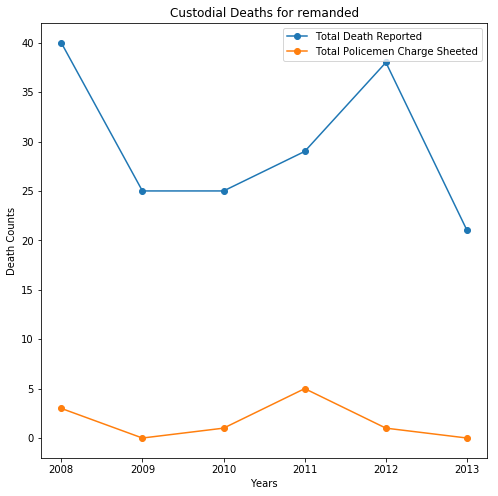

The summary of custodial deaths remanded is as below:


,Year,Death_Reported,Police_Chargesheeted,Total_Policemen_Convicted
0,2008,40,3,0
1,2009,25,0,0
2,2010,25,1,0
3,2011,29,5,0
4,2012,38,1,0
5,2013,21,0,0


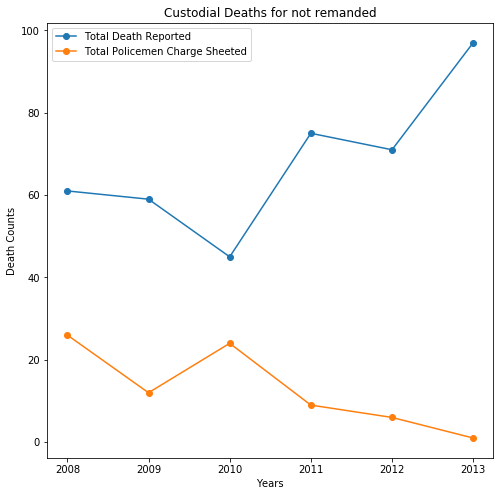

The summary of custodial deaths not remanded is as below:


,Year,Death_Reported,Police_Chargesheeted,Total_Policemen_Convicted
2008,2008,61,26,0
2009,2009,59,12,4
2010,2010,45,24,3
2011,2011,75,9,0
2012,2012,71,6,0
2013,2013,97,1,0


In [16]:
# lets plot for the  Remanded and Not remanded statistics
# for remanded
x= [sum(custodial_remanded_df.Death_Reported[custodial_remanded_df.Year==y]) for y in np.arange(2008,2014)]
y= [sum(custodial_remanded_df.Police_Charge_Sheeted[custodial_remanded_df.Year==y]) for y in np.arange(2008,2014)]
plot_df = pd.DataFrame({"Year":[str(y) for y in np.arange(2008,2014)],
                         "Death_Reported": x,
                       "Police_Chargesheeted": y},)

lines = plot_df.plot.line(xticks =np.arange(6),marker="o",figsize=(8,8))
lines.set_xticklabels(np.arange(2008,2014))
lines.set_xlabel("Years")
lines.set_ylabel("Death Counts")
lines.set_title("Custodial Deaths for remanded")
lines.legend(["Total Death Reported", "Total Policemen Charge Sheeted"])
plt.show()


plot_df['Total_Policemen_Convicted'] = [sum(custodial_remanded_df.Police_Convicted[custodial_remanded_df.Year == y]) for y in np.arange(2008,2014)]
print('The summary of custodial deaths remanded is as below:')
display(plot_df)

# for not_remanded

x= [sum(custodial_not_remanded_df.Death_Reported[custodial_not_remanded_df.Year==y]) for y in np.arange(2008,2014)]
y= [sum(custodial_not_remanded_df.Police_Charge_Sheeted[custodial_not_remanded_df.Year==y]) for y in np.arange(2008,2014)]
plot_df = pd.DataFrame({"Year":[str(y) for y in np.arange(2008,2014)],
                         "Death_Reported": x,
                       "Police_Chargesheeted": y},
                      index = [str(y) for y in np.arange(2008,2014)])

lines = plot_df.plot.line(xticks =np.arange(6),marker="o",figsize=(8,8))
lines.set_xticklabels(np.arange(2008,2014))
lines.set_xlabel("Years")
lines.set_ylabel("Death Counts")
lines.set_title("Custodial Deaths for not remanded")
lines.legend(["Total Death Reported", "Total Policemen Charge Sheeted"])
plt.show()

plot_df['Total_Policemen_Convicted'] = [sum(custodial_not_remanded_df.Police_Convicted[custodial_not_remanded_df.Year == y]) for y in np.arange(2008,2014)]
print('The summary of custodial deaths not remanded is as below:')
display(plot_df)

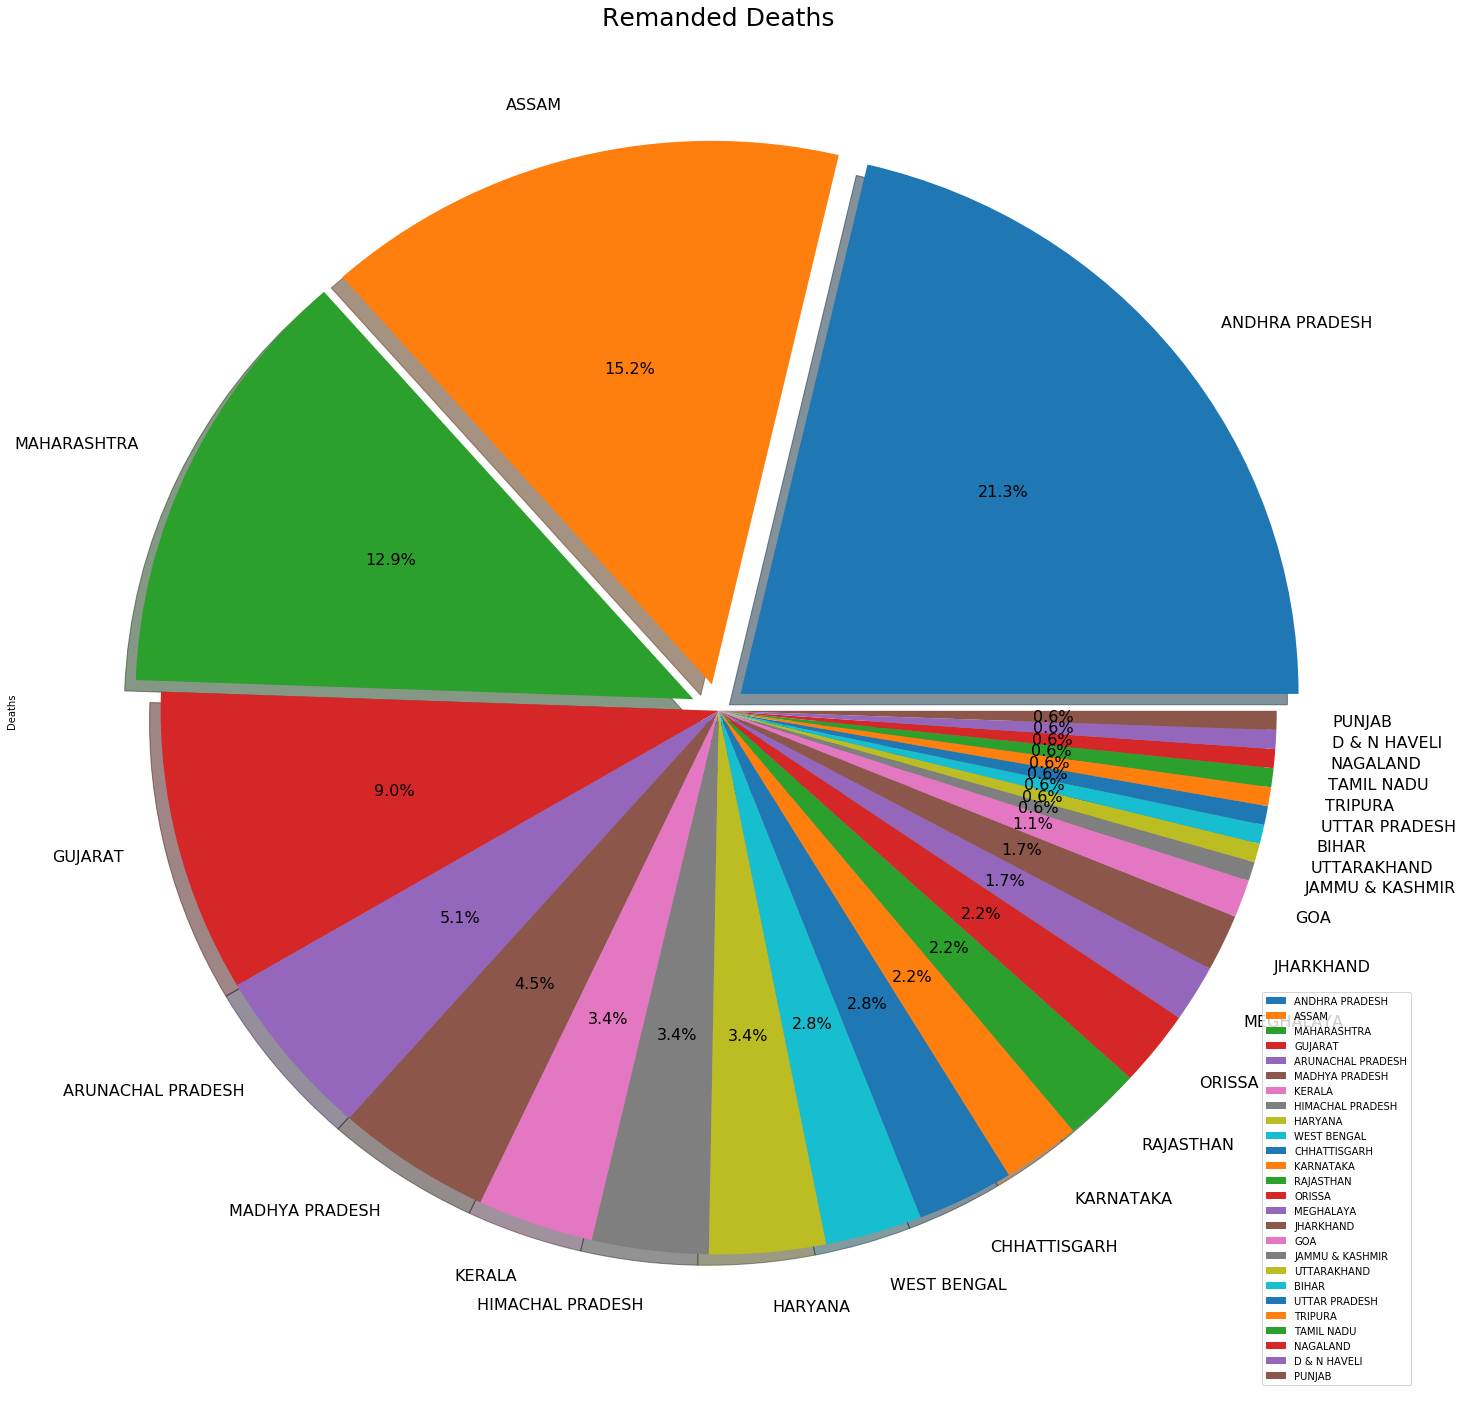

Lets see the top ten contirbutors for the remanded deaths


,State_UT,Deaths
1,ANDHRA PRADESH,38
3,ASSAM,27
20,MAHARASHTRA,23
11,GUJARAT,16
2,ARUNACHAL PRADESH,9
19,MADHYA PRADESH,8
17,KERALA,6
13,HIMACHAL PRADESH,6
12,HARYANA,6
34,WEST BENGAL,5


States with no custodial remanded deaths for the years 2008-2013 are:


,State_UT,Deaths
8,DAMAN & DIU,0
29,SIKKIM,0
26,PUDUCHERRY,0
18,LAKSHADWEEP,0
23,MIZORAM,0
9,DELHI,0
21,MANIPUR,0
5,CHANDIGARH,0
0,A & N ISLANDS,0


In [17]:
states = custodial_remanded_df.State_UT.unique()
deaths = [sum(custodial_remanded_df.Death_Reported[custodial_remanded_df.State_UT == y]) for y in states]
summary_df = pd.DataFrame({"State_UT": states, "Deaths": deaths})
summary_df = summary_df.sort_values(by=['Deaths'], ascending = False)
#display(summary_df[summary_df.Deaths > 0])
# lets plot a pie chart to have a look at the contribution of each state or UT for custodial deaths
#for remanded
x = summary_df.State_UT[summary_df.Deaths > 0].values.tolist()
y =  summary_df.Deaths[summary_df.Deaths > 0].values.tolist()
list1 = [0.05,0.05,0.05]
list1.extend([0.0]*(len(x)-3))
explode = tuple(list1)
plot_df = pd.DataFrame({"State_UT":x, 
                        "Deaths" :y},
                       index=summary_df.State_UT[summary_df.Deaths > 0])
plot_df.plot.pie(y='Deaths',figsize=(25,25),autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=0, textprops={'fontsize': 16})
plt.title("Remanded Deaths", fontsize=25)
plt.show()

print("Lets see the top ten contirbutors for the remanded deaths")
display(summary_df[0:10])

print("States with no custodial remanded deaths for the years 2008-2013 are:")
display(summary_df[summary_df.Deaths ==0])

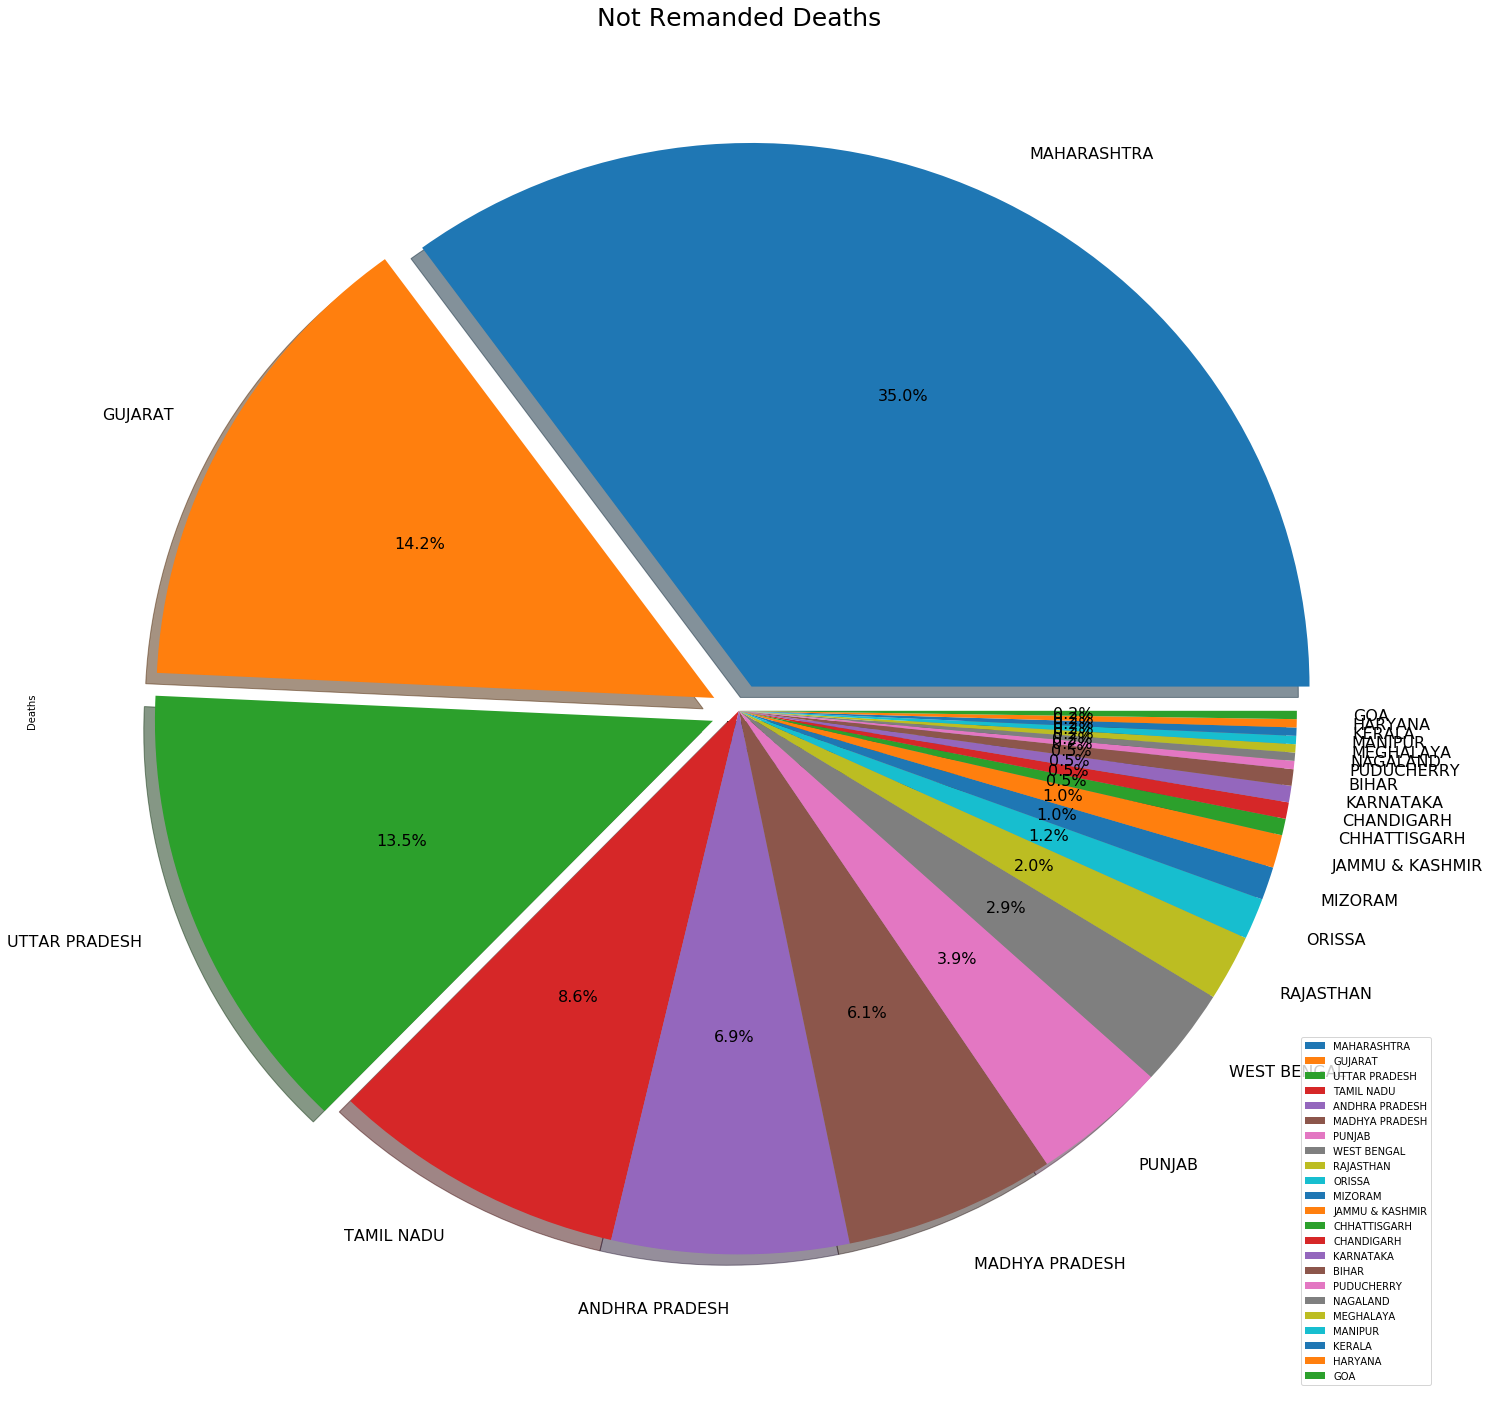

Lets see the top ten contirbutors for the not remanded deaths


,State_UT,Deaths
20,MAHARASHTRA,143
11,GUJARAT,58
32,UTTAR PRADESH,55
30,TAMIL NADU,35
1,ANDHRA PRADESH,28
19,MADHYA PRADESH,25
27,PUNJAB,16
34,WEST BENGAL,12
28,RAJASTHAN,8
25,ORISSA,5


States with no custodial not remanded deaths for the years 2008-2013 are:


,State_UT,Deaths
18,LAKSHADWEEP,0
15,JHARKHAND,0
13,HIMACHAL PRADESH,0
9,DELHI,0
8,DAMAN & DIU,0
7,D & N HAVELI,0
29,SIKKIM,0
3,ASSAM,0
31,TRIPURA,0
2,ARUNACHAL PRADESH,0


In [166]:
states = custodial_not_remanded_df.State_UT.unique()
deaths = [sum(custodial_not_remanded_df.Death_Reported[custodial_not_remanded_df.State_UT == y]) for y in states]
summary_df = pd.DataFrame({"State_UT": states, "Deaths": deaths})
summary_df = summary_df.sort_values(by=['Deaths'], ascending = False)
#display(summary_df[summary_df.Deaths > 0])
# lets plot a pie chart to have a look at the contribution of each state or UT for custodial deaths
#for remanded
x = summary_df.State_UT[summary_df.Deaths > 0].values.tolist()
y =  summary_df.Deaths[summary_df.Deaths > 0].values.tolist()
list1 = [0.05,0.05,0.05]
list1.extend([0.0]*(len(x)-3))
explode = tuple(list1)
plot_df = pd.DataFrame({"State_UT":x, 
                        "Deaths" :y},
                       index=summary_df.State_UT[summary_df.Deaths > 0])
plot_df.plot.pie(y='Deaths',figsize=(25,25),autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=0, textprops={'fontsize': 16})
plt.title("Not Remanded Deaths", fontsize=25)
plt.show()

print("Lets see the top ten contirbutors for the not remanded deaths")

display(summary_df[0:10])

print("States with no custodial not remanded deaths for the years 2008-2013 are:")
summary_df[summary_df.Deaths ==0]

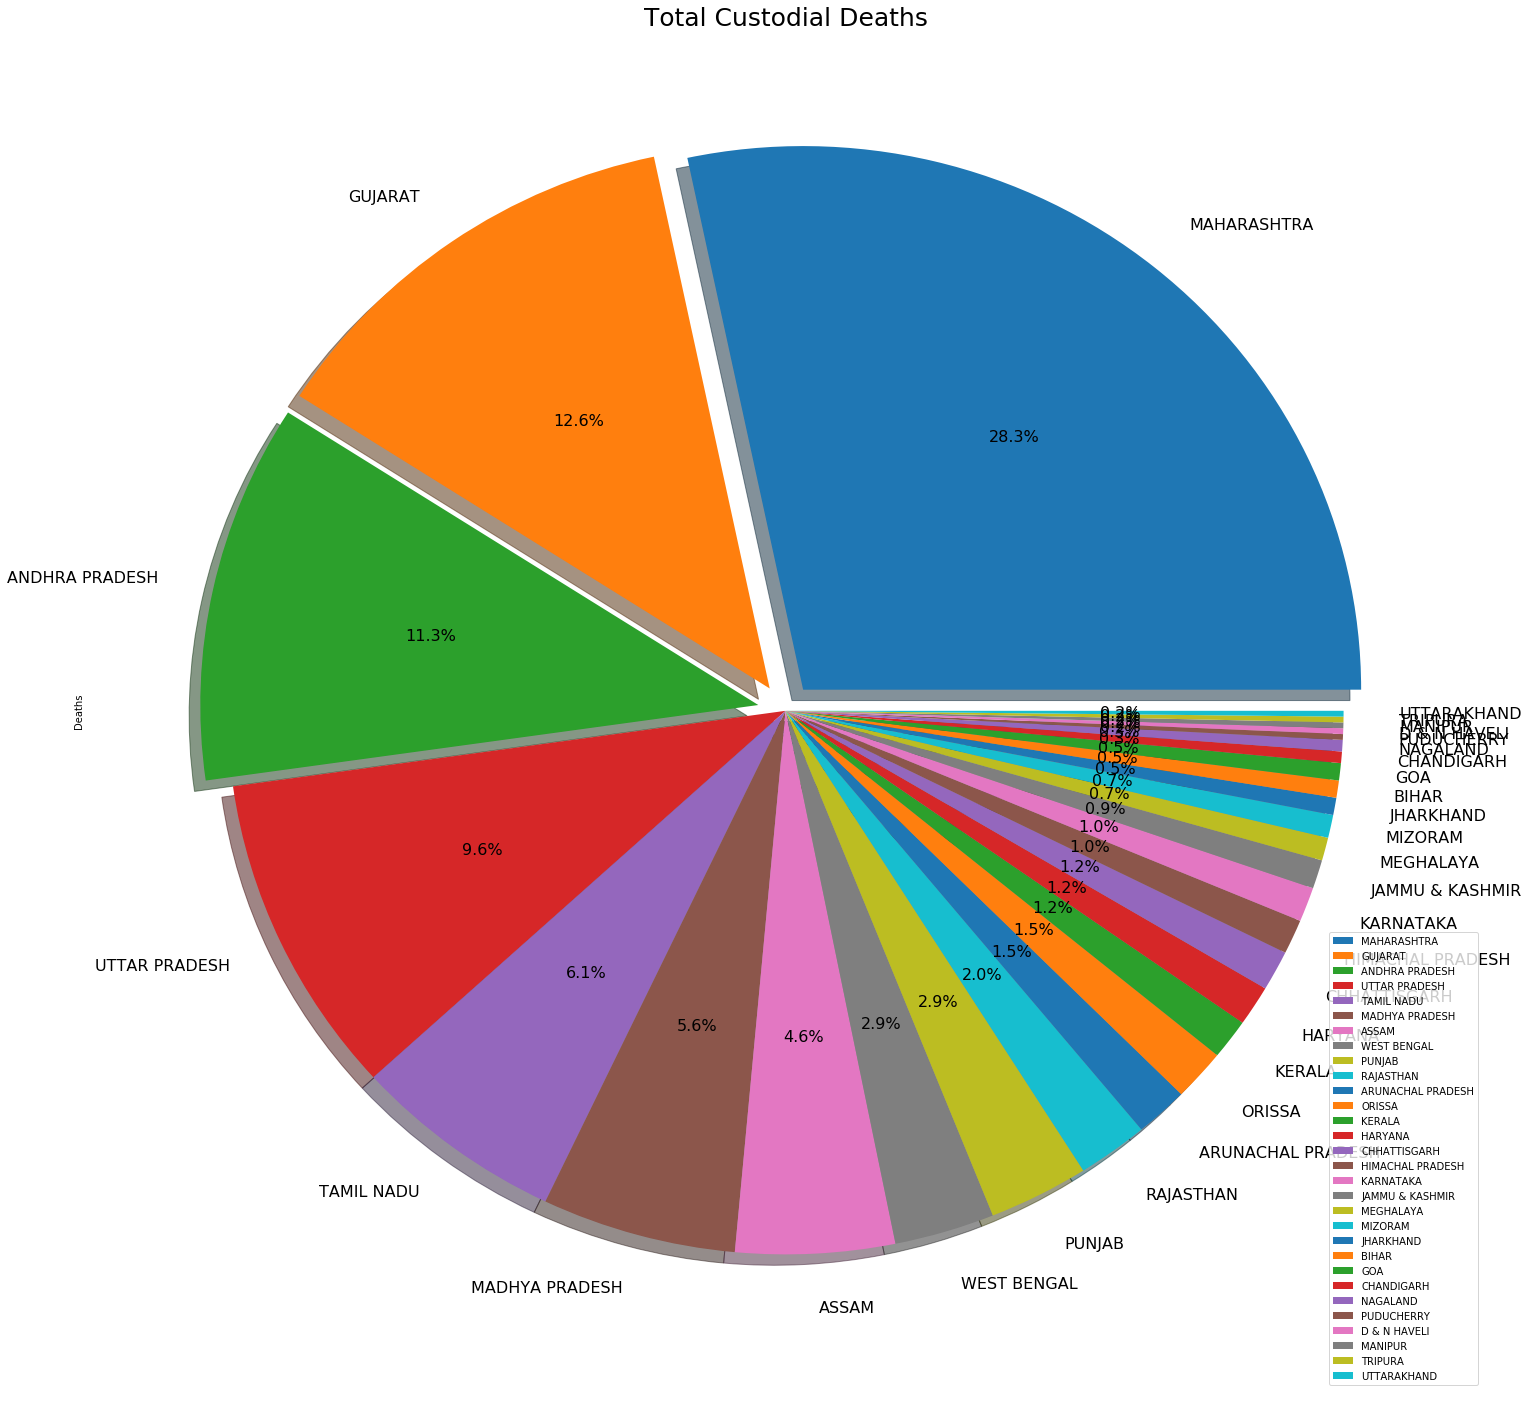

Lets see the top ten contirbutors for the total Custodial Deaths


,State_UT,Deaths
20,MAHARASHTRA,166
11,GUJARAT,74
1,ANDHRA PRADESH,66
32,UTTAR PRADESH,56
30,TAMIL NADU,36
19,MADHYA PRADESH,33
3,ASSAM,27
34,WEST BENGAL,17
27,PUNJAB,17
28,RAJASTHAN,12


States with no custodial deaths for the years 2008-2013 are:
         State_UT  Deaths
8     DAMAN & DIU       0
29         SIKKIM       0
9           DELHI       0
18    LAKSHADWEEP       0
0   A & N ISLANDS       0


In [19]:
#lets see the similar statistics for total custodial deaths. 

states = Custodial_Death_df.State_UT.unique()
deaths = [sum(Custodial_Death_df.Death_Reported[Custodial_Death_df.State_UT == y]) for y in states]
summary_df = pd.DataFrame({"State_UT": states, "Deaths": deaths})
summary_df = summary_df.sort_values(by=['Deaths'], ascending = False)
#display(summary_df[summary_df.Deaths > 0])
# lets plot a pie chart to have a look at the contribution of each state or UT for custodial deaths
#for remanded
x = summary_df.State_UT[summary_df.Deaths > 0].values.tolist()
y =  summary_df.Deaths[summary_df.Deaths > 0].values.tolist()
list1 = [0.05,0.05,0.05]
list1.extend([0.0]*(len(x)-3))
explode = tuple(list1)
plot_df = pd.DataFrame({"State_UT":x, 
                        "Deaths" :y},
                       index=summary_df.State_UT[summary_df.Deaths > 0])
plot_df.plot.pie(y='Deaths',figsize=(25,25),autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=0, textprops={'fontsize': 16})
plt.title("Total Custodial Deaths", fontsize=25)
plt.show()

print("Lets see the top ten contirbutors for the total Custodial Deaths")

display(summary_df[0:10])

print("States with no custodial deaths for the years 2008-2013 are:")
print(summary_df[summary_df.Deaths ==0])

In [20]:
print("The states where Policemen were convited for the custodial deaths are")
display(Custodial_Death_df[Custodial_Death_df.Police_Convicted>0][['State_UT',
                                                                          'Death_Reported',
                                                                          'Police_Charge_Sheeted',
                                                                        'Police_Convicted','Remanded']])
print("Out of 28 states and 7 Union territories \n For " + str(sum(Custodial_Death_df.Death_Reported)) +
     " Total Custodial Deaths \n The total Policemen Charge Sheeted are: " +
      str(sum(Custodial_Death_df.Police_Charge_Sheeted)))

print("And the Total Police Convicted are: ", str(sum(Custodial_Death_df.Police_Convicted)))

perc = round((sum(Custodial_Death_df.Police_Convicted)/sum(Custodial_Death_df.Police_Charge_Sheeted))*100,2)
print("Making the Percentage of the conviction for the Charge Sheeted to be: ",perc,"%")

The states where Policemen were convited for the custodial deaths are


,State_UT,Death_Reported,Police_Charge_Sheeted,Police_Convicted,Remanded
402,UTTAR PRADESH,6,4,4,No
406,UTTAR PRADESH,9,19,3,No


Out of 28 states and 7 Union territories 
 For 586 Total Custodial Deaths 
 The total Policemen Charge Sheeted are: 88
And the Total Police Convicted are:  7
Making the Percentage of the conviction for the Charge Sheeted to be:  7.95 %


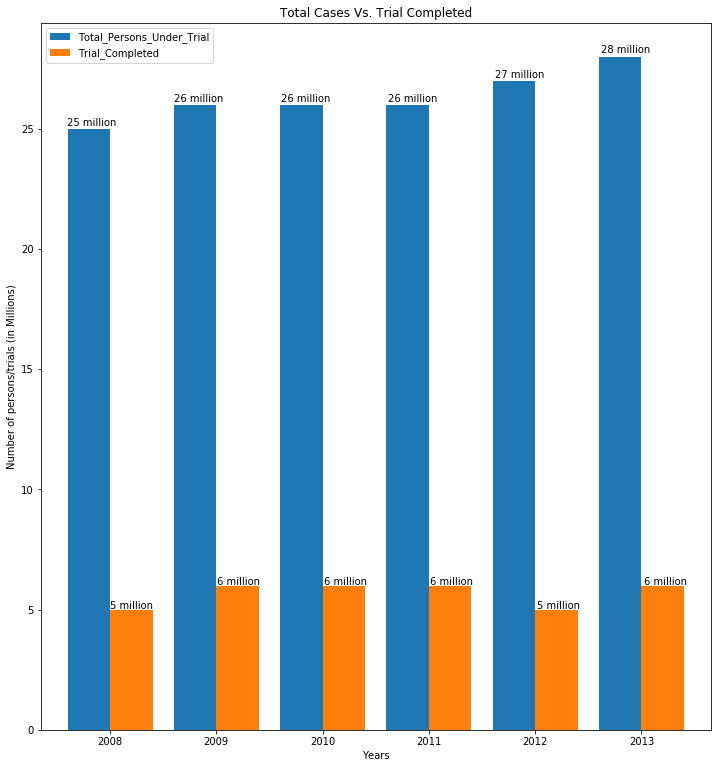

We can see that only 20% of the trials are completed each year


In [21]:
# Lets have a look at the Disposal of cases for each year and the total trials completed
#Disposal_IPC_df
#Disposal_SLL_df
#Disposal_by_courts_df
total_trial = [int(sum(Disposal_by_courts_df.Persons_Under_Trial[Disposal_by_courts_df.Year==y])/1000000) for y in np.arange(2008,2014)]
trial_completed = [int(sum(Disposal_by_courts_df.Trial_Completed[Disposal_by_courts_df.Year==y])/1000000) for y in np.arange(2008,2014)]

summary_df = pd.DataFrame({"Year":np.arange(2008,2014),
                           "Total_Persons_Under_Trial": total_trial,
                        "Trial_Completed":trial_completed})


#ylims = (min(summary_df.iloc[:,2])/2, round(max(summary_df.iloc[:,1])*1.1 , 2))

p = summary_df.iloc[:,[1,2]].plot.bar(figsize=(12,13),width=0.8,title="Total Cases Vs. Trial Completed")

p.set_xticklabels(np.arange(2008,2014), rotation=0)
p.set_xlabel("Years")
p.set_ylabel("Number of persons/trials (in Millions)")
for x in p.patches:
    p.annotate(str(x.get_height())+' million', (x.get_x() * 1.005, x.get_height() * 1.005))
plt.show()
print("We can see that only 20% of the trials are completed each year")

In [22]:
Disposal_by_courts_df.columns

Index(['State_UT', 'Persons_Under_Trial', 'Compounded_Withdrawn',
       'Trial_Completed', 'Trial_Pending', 'Total_People_Convicted',
       'Percentage_Pendency', 'Percentage_Pendency_To_Total', 'Year',
       'IPC_SLL'],
      dtype='object')

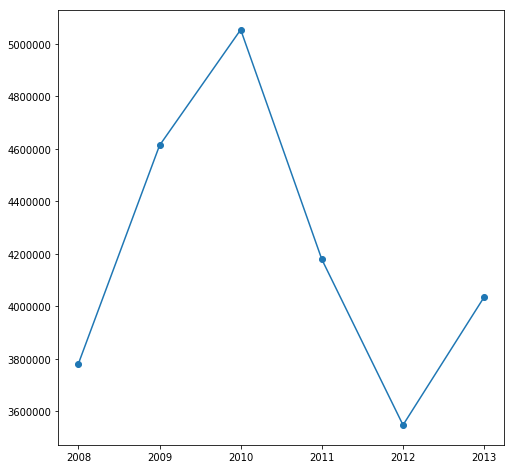

We can see that the number of convictions was highest for the year 2010, and least for the year 2012


In [23]:
# Lets see how many people are convicted each year by courts
convict = [sum(Disposal_by_courts_df.Total_People_Convicted[Disposal_by_courts_df.Year == y]) for y in np.arange(2008,2014)]
plot_df = pd.DataFrame({"Convictions": convict})
p= plot_df.plot.line(xticks =np.arange(6),marker="o",figsize=(8,8),legend=False)
p.set_xticklabels(np.arange(2008,2014))
plt.show()
print("We can see that the number of convictions was highest for the year 2010, and least for the year 2012")

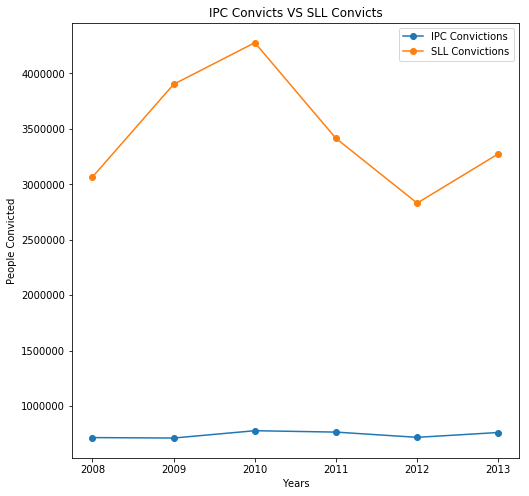

We can see that the SLL convictions are too large when compared to the IPC convictions.
Does this


In [24]:
# lets see the trend lines for IPC and  SLL crimes
sll_convict = [sum(Disposal_SLL_df.Total_People_Convicted[Disposal_SLL_df.Year==y]) for y in np.arange(2008,2014)]
ipc_convict =[sum(Disposal_IPC_df.Total_People_Convicted[Disposal_IPC_df.Year==y]) for y in np.arange(2008,2014)]
plot_df = pd.DataFrame({"IPC_Convictions": ipc_convict,
                        "SLL_Convictions": sll_convict})

lines = plot_df.plot.line(xticks =np.arange(6),marker="o",figsize=(8,8))
lines.set_xticklabels(np.arange(2008,2014))
lines.set_xlabel("Years")
lines.set_ylabel("People Convicted")
lines.set_title("IPC Convicts VS SLL Convicts")
lines.legend(["IPC Convictions", "SLL Convictions"])
plt.show()
print("We can see that the SLL convictions are too large when compared to the IPC convictions.")
print("Does this")

We can see that the SLL convictions are too large when compared to the IPC convictions.
This brings us to the question: Does the number of persons under trial for SLL crimes is considerably higher
than the number of persons under trial for IPC crimes?

In [ ]:
# Lets see if we can see how the

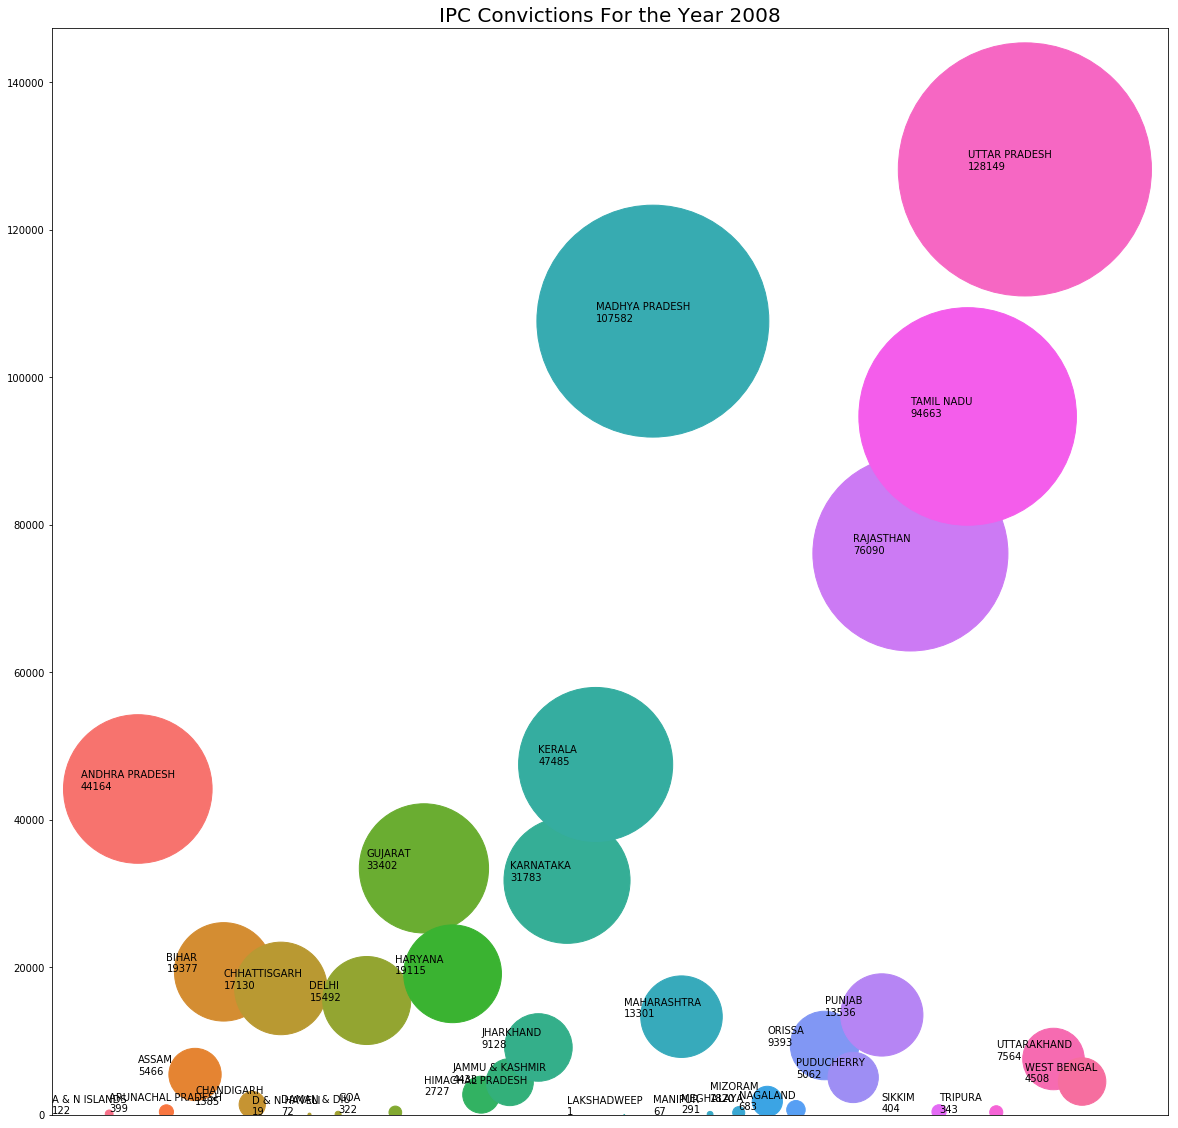

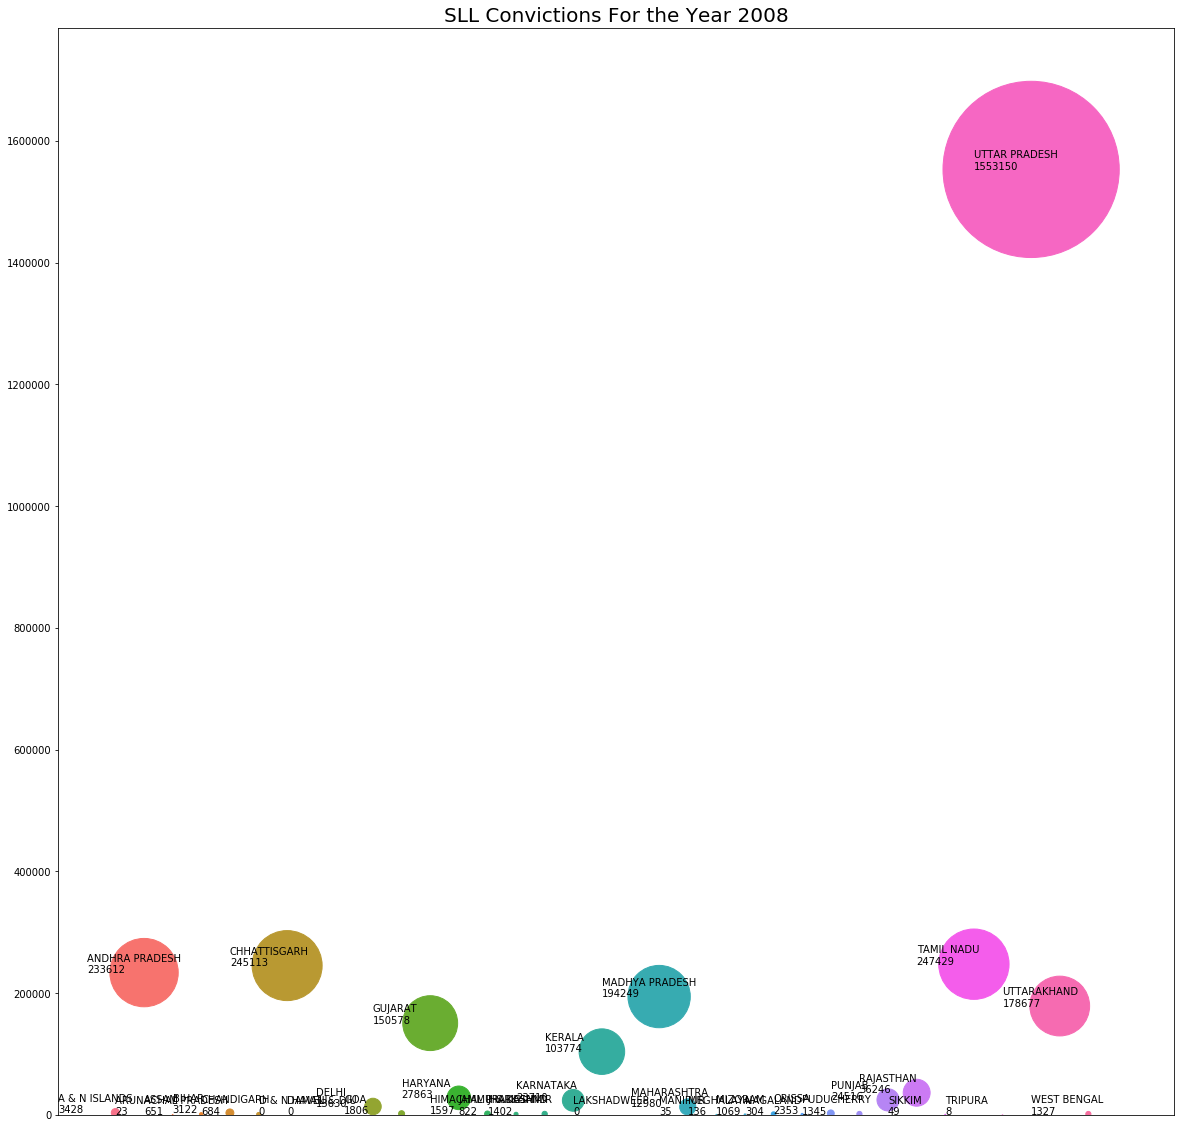

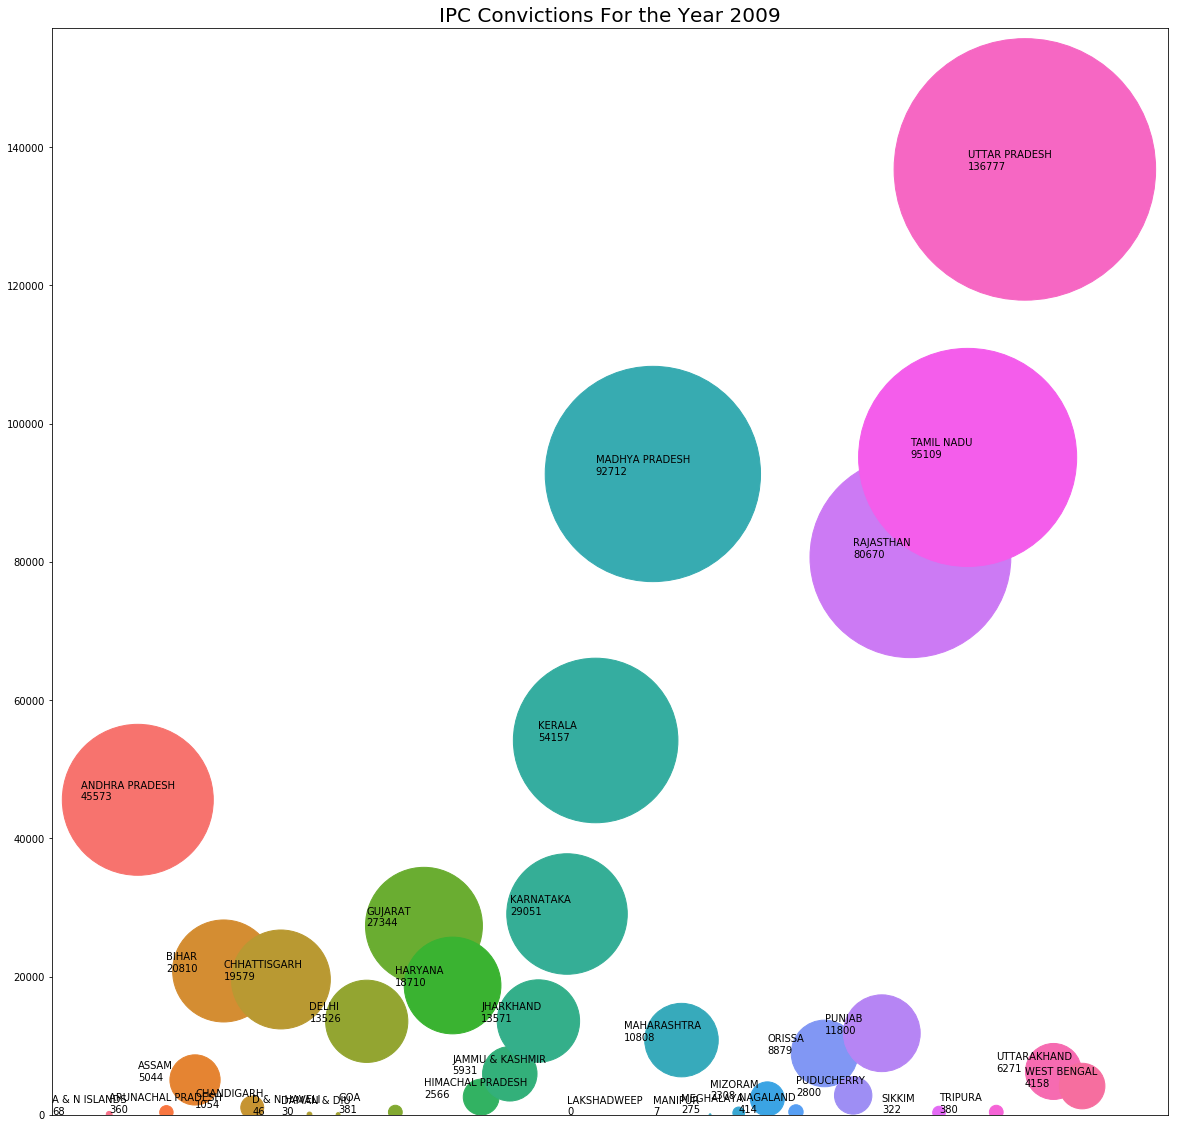

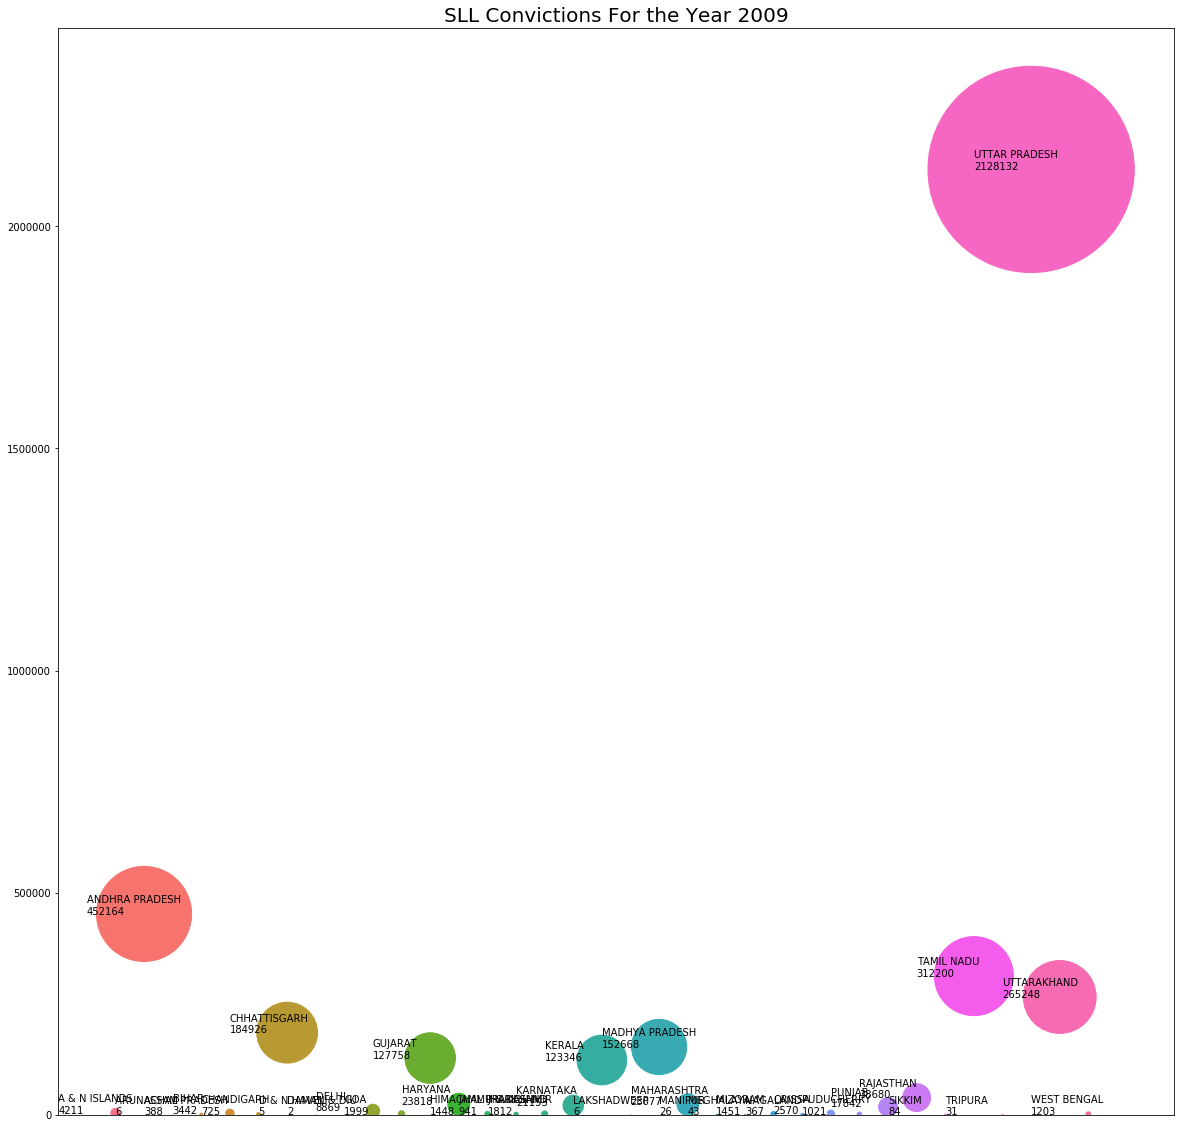

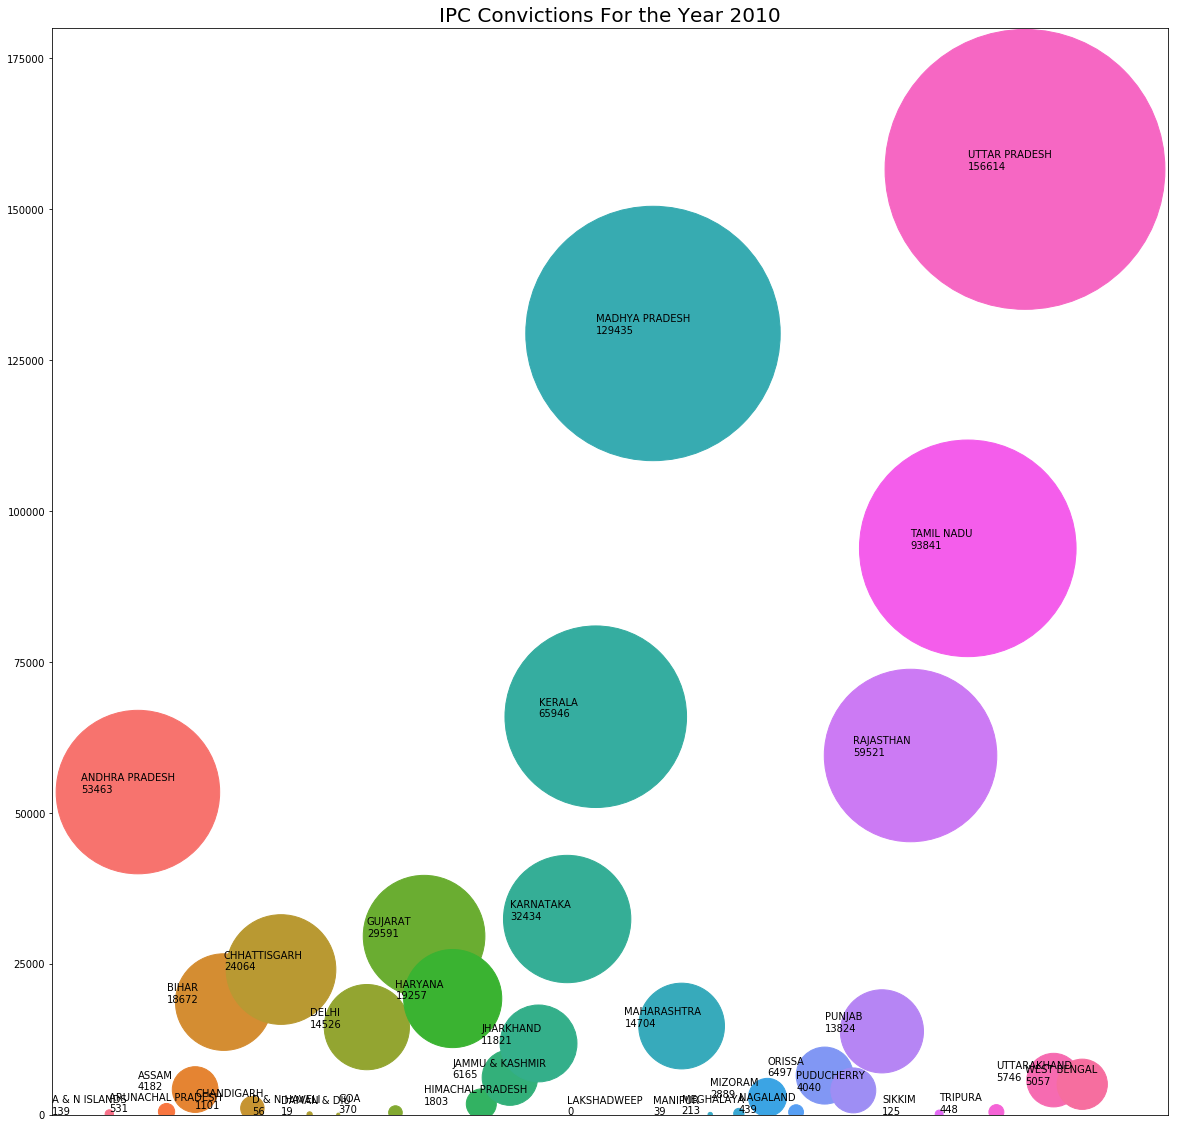

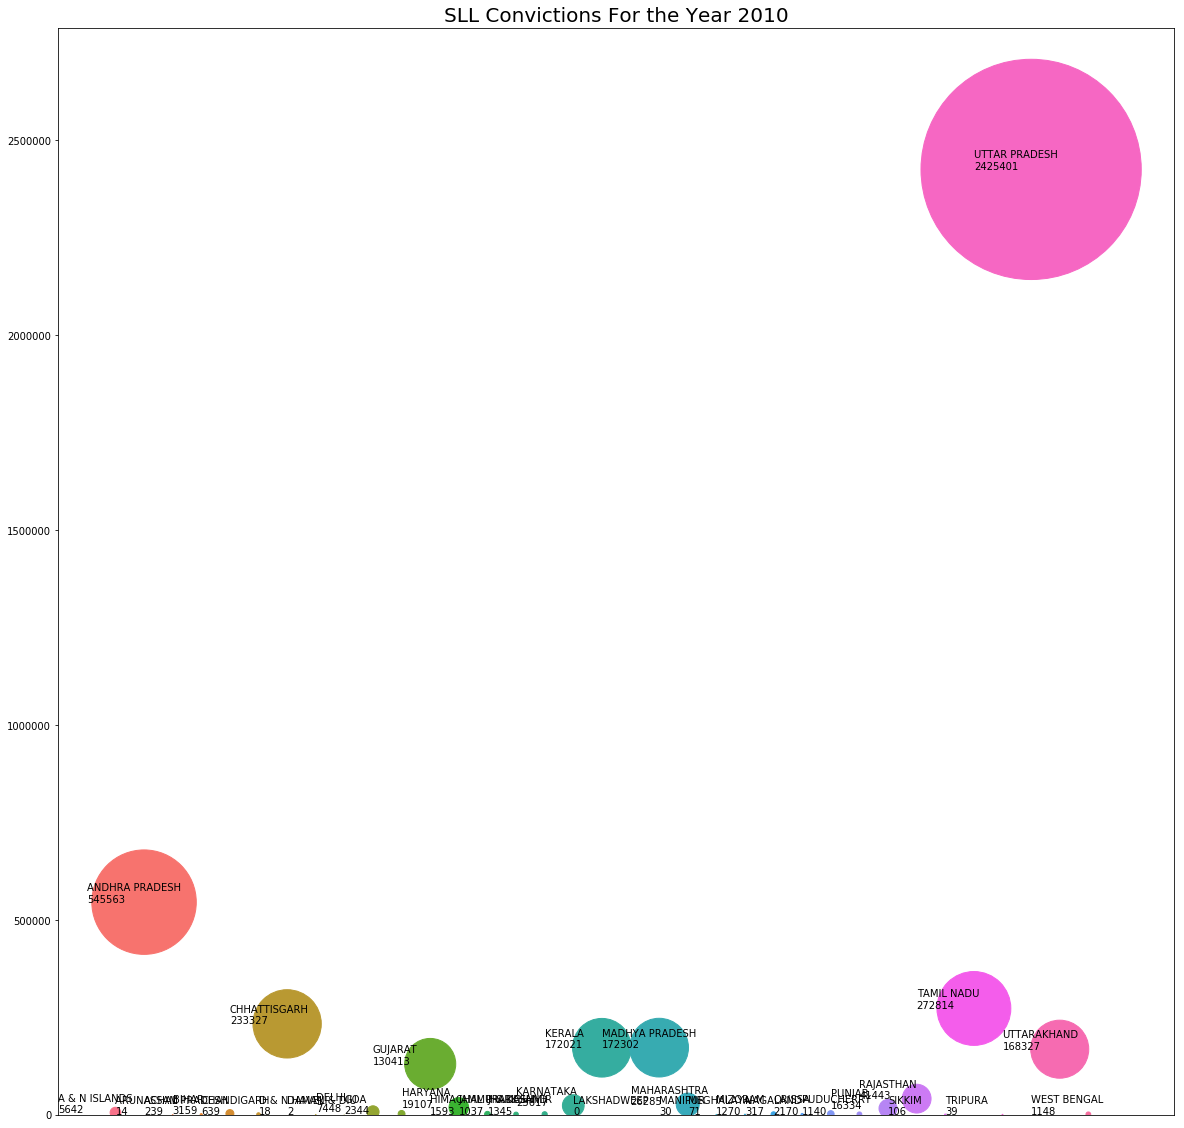

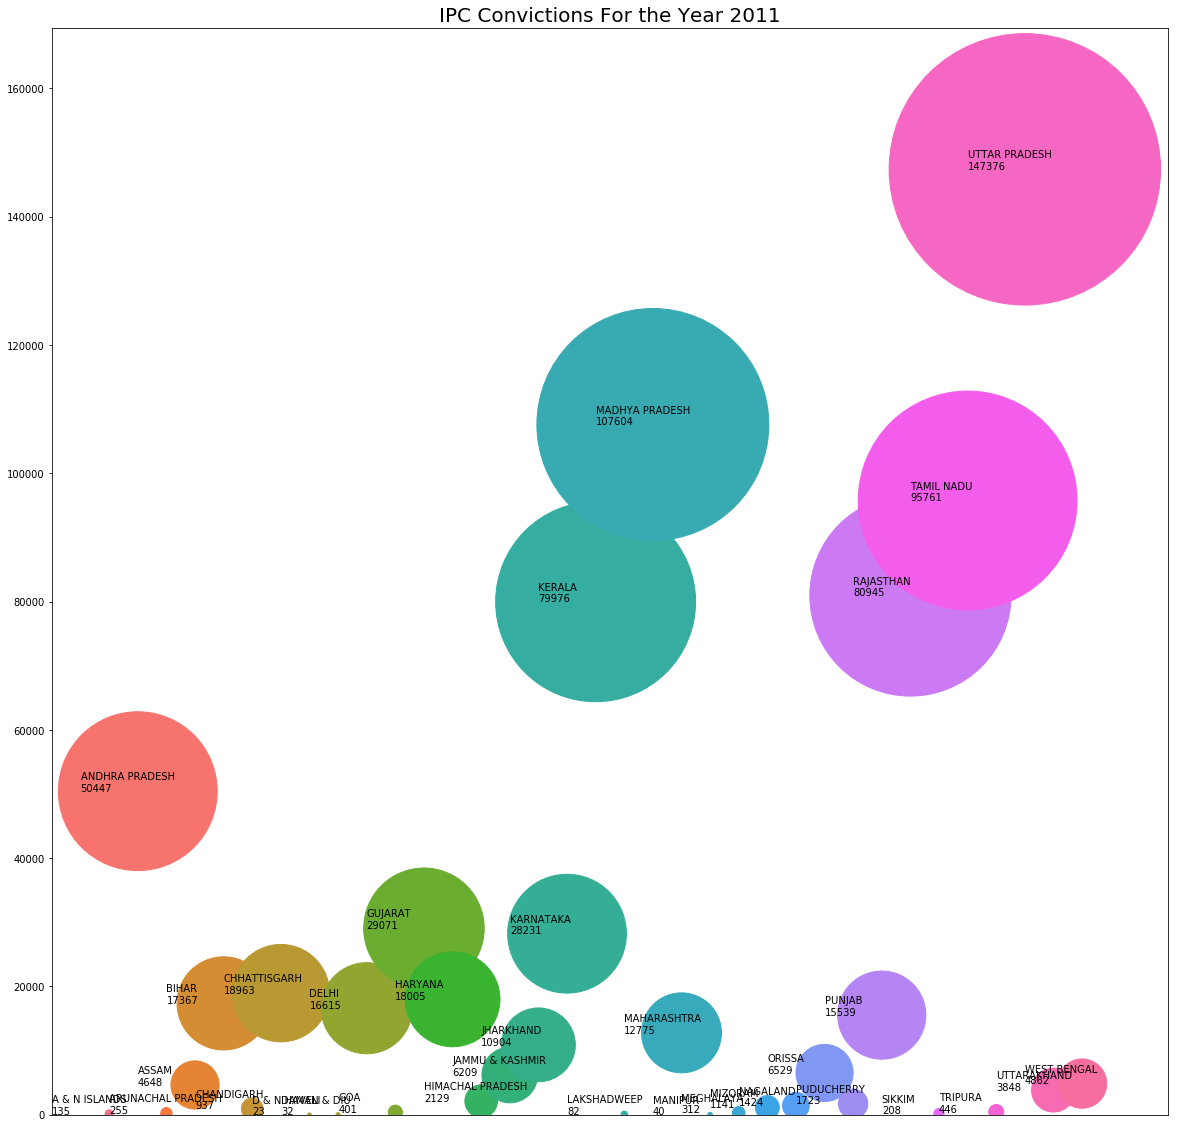

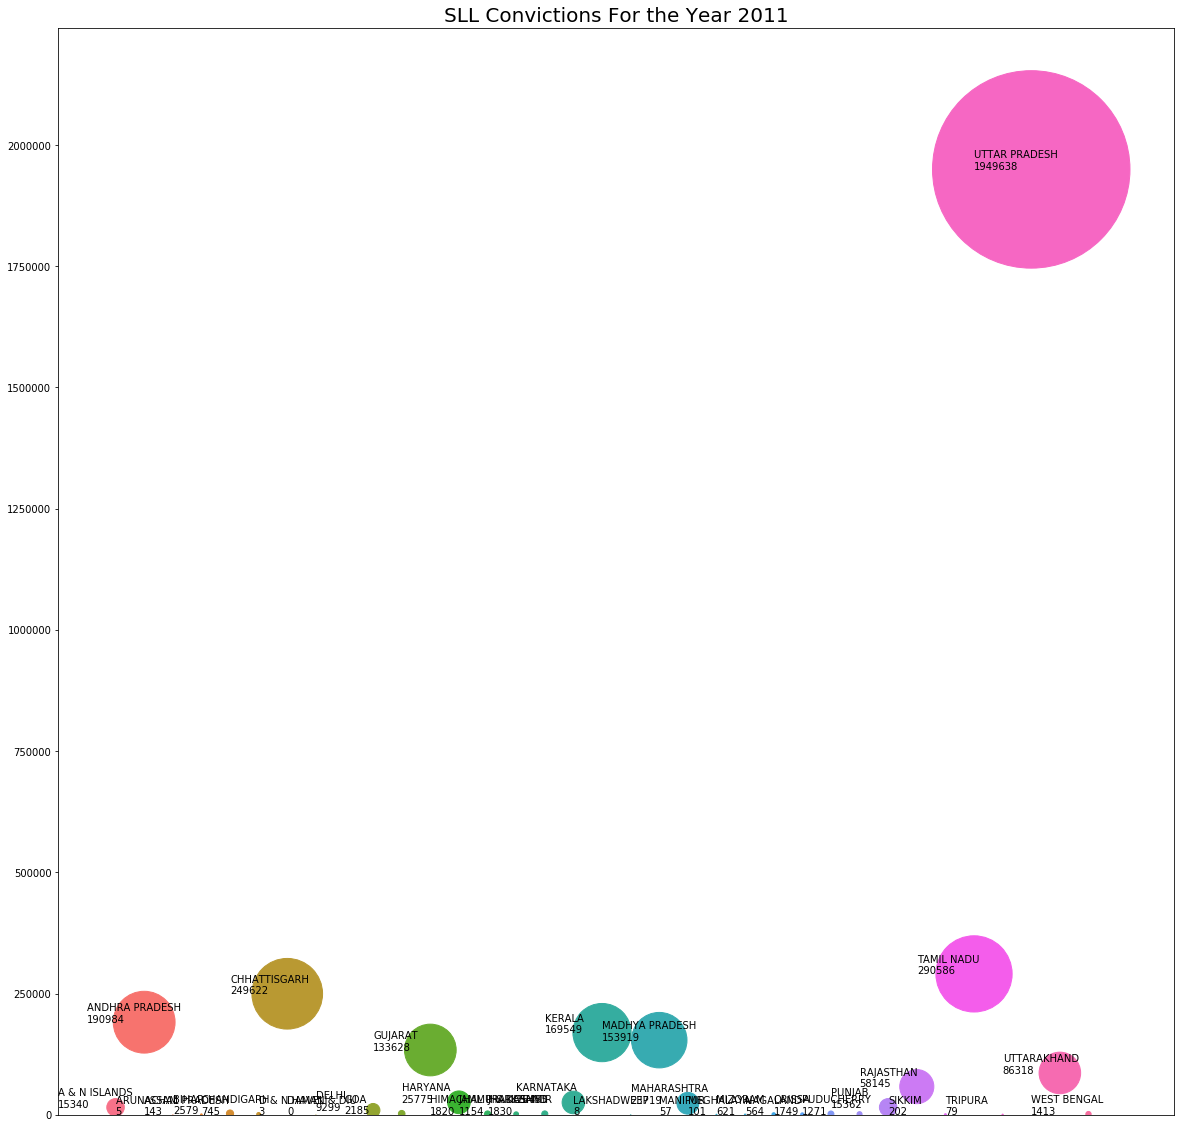

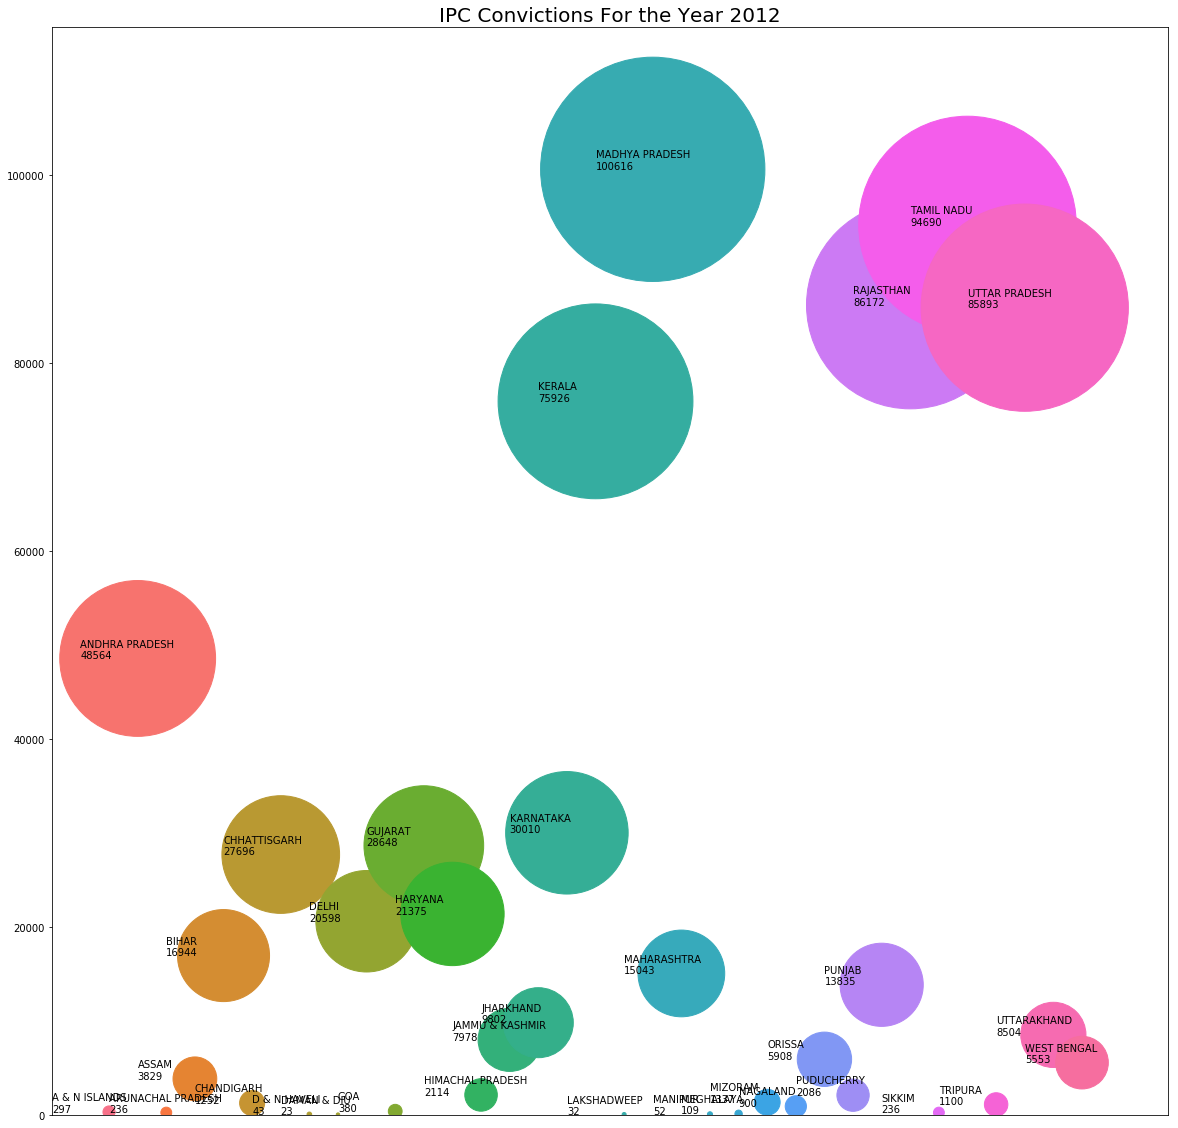

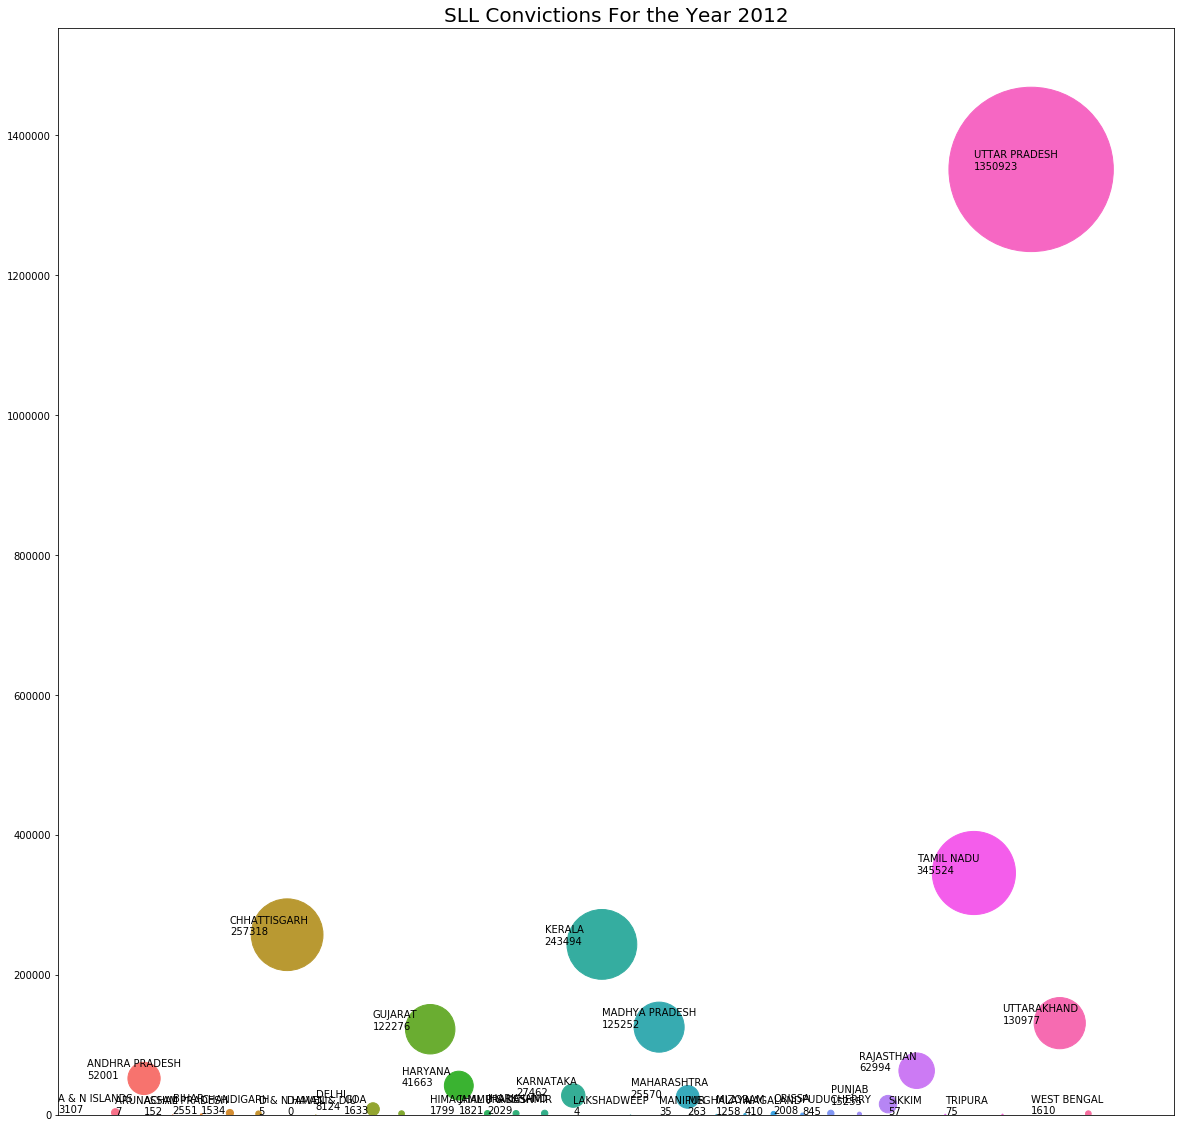

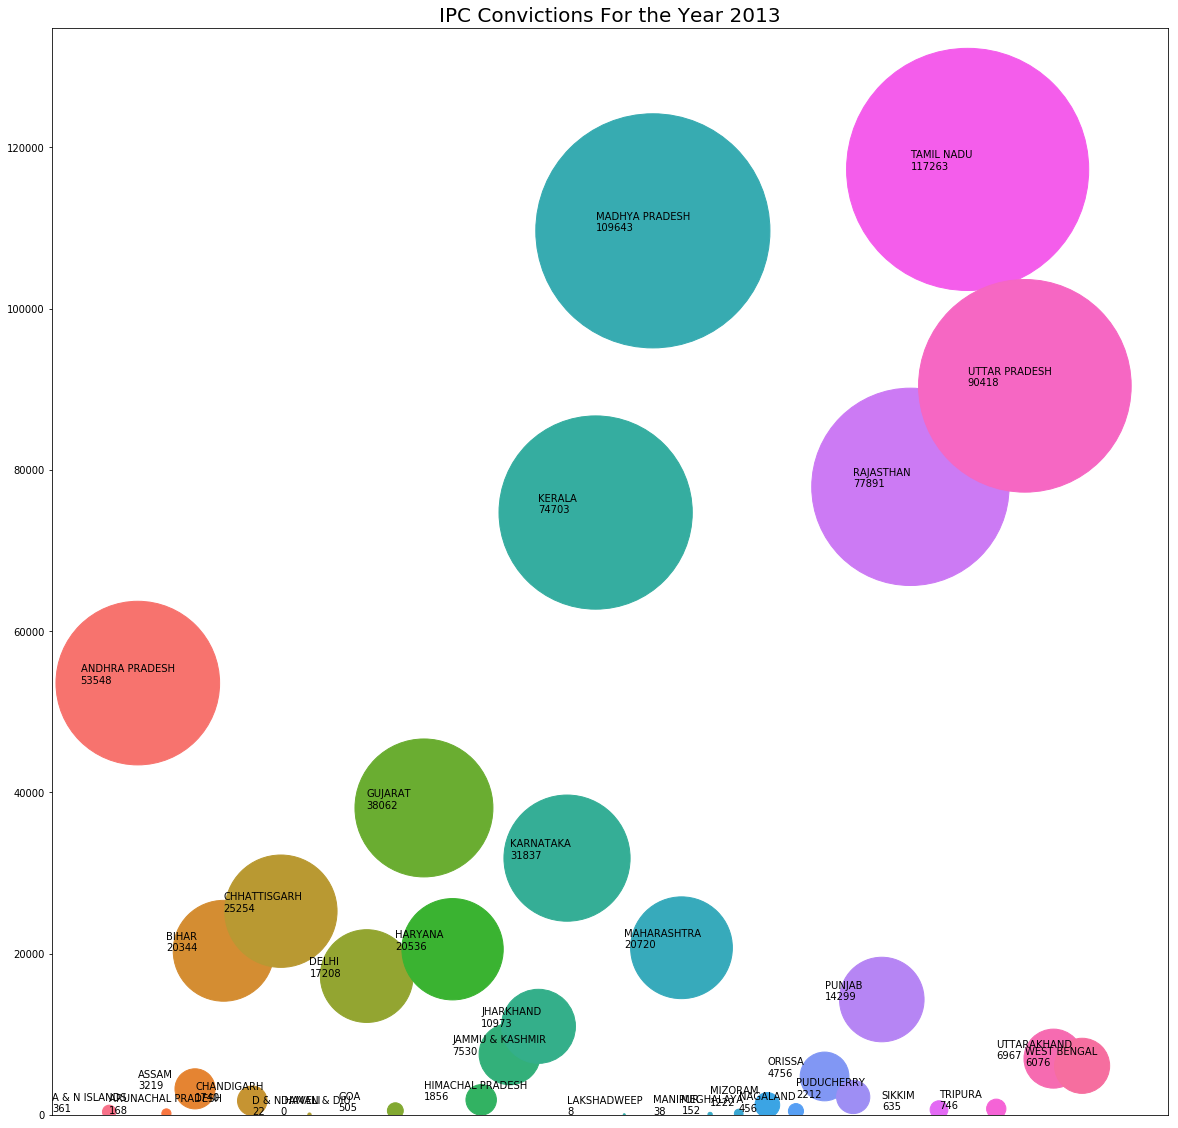

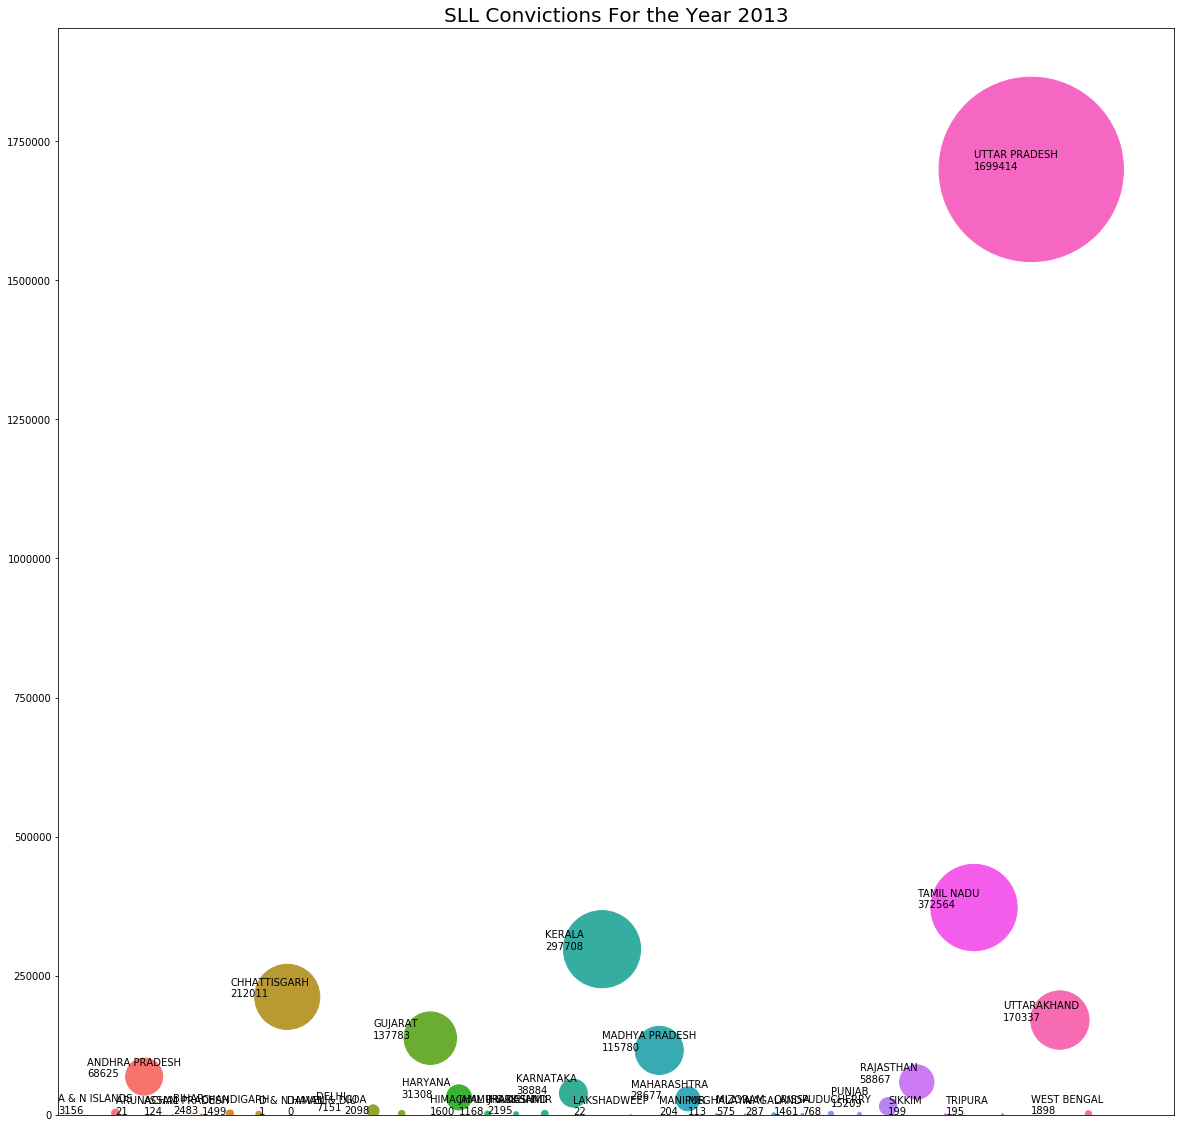

In [172]:
#lets plot a scatter plot which show SLL and IPC crime conviction statistics for each year
year_list = np.arange(2008,2014)
for k in np.arange(6):
    # for ipc
    ys = [int(Disposal_IPC_df.Total_People_Convicted[(Disposal_IPC_df.Year == year_list[k]) &
                                               (Disposal_IPC_df.State_UT == s)].values[0]) for s in Disposal_IPC_df.State_UT.unique()]
    sizes = [k/2 for k in ys]
    plt.figure(figsize=(20,20))
    x = np.arange(0,len(ys))
    clrs = sns.color_palette('husl', n_colors=len(ys))
    p=plt.scatter(x ,y=ys,s=sizes,c=clrs)
    plt.title("IPC Convictions For the Year "+str(year_list[k]),fontsize=20)
    #plt.axis('off')
    plt.xticks([])
    plt.ylim(min(ys)/2,max(ys)*1.15)
    plt.xlim(-2,len(ys)+2)
    for i,txt in enumerate(Disposal_IPC_df.State_UT.unique()):
        plt.annotate(txt+"\n"+str(ys[i]),(x[i]-2,ys[i]+2))
    plt.show()
    
    # for sll
    ys = [int(Disposal_SLL_df.Total_People_Convicted[(Disposal_SLL_df.Year == year_list[k]) &
                                               (Disposal_SLL_df.State_UT == s)].values[0]) for s in Disposal_SLL_df.State_UT.unique()]
    sizes = [k*0.02 for k in ys]
    plt.figure(figsize=(20,20))
    x = np.arange(0,len(ys))
    clrs = sns.color_palette('husl', n_colors=len(ys))
    p=plt.scatter(x ,y=ys,s=sizes,c=clrs)
    plt.title("SLL Convictions For the Year "+str(year_list[k]),fontsize=20)
    #plt.axis('off')
    plt.xticks([])
    plt.ylim(min(ys)/2,max(ys)*1.15)
    plt.xlim(-2,len(ys)+2)
    for i,txt in enumerate(Disposal_SLL_df.State_UT.unique()):
        plt.annotate(txt+"\n"+str(ys[i]),(x[i]-2,ys[i]+2))
    plt.show()




It is  evident that Uttar Pradesh Stands at top of the conviction rate both under IPC (Indian Penal Code) and SLL (Special Local Laws).
This state is followed by Tamil Nadu, Madhya Pradesh, Kerala, Rajasthan. 

Lets see how many cases are pending each for these 5 states for 6 years

In [173]:
# create a list of states
state_list = ['UTTAR PRADESH','MADHYA PRADESH','TAMIL NADU','KERALA','RAJASTHAN']

reset_output()
output_notebook()
for s in np.arange(len(state_list)):
    x = Disposal_SLL_df.Percentage_Pendency[Disposal_SLL_df.State_UT == state_list[s]]
    y = Disposal_IPC_df.Percentage_Pendency[Disposal_IPC_df.State_UT == state_list[s]]
    p = figure(plot_width=600, plot_height=400, 
               title="Percentage of  SLL/IPC Cases Pending \n For the state:"+state_list[s], 
               x_axis_label = "Year", y_axis_label = "Percentage of Cases Pending")
    p.circle(np.arange(6),x,size=5,color="blue",legend="SLL Cases")
    p.line(np.arange(6),x,color="blue",legend="SLL Cases")
    p.circle(np.arange(6),y,size=5,color="orange",legend="IPC Cases")
    p.line(np.arange(6),y,color="orange",legend="IPC Cases")
    p.xaxis.ticker =[0,1,2,3,4,5]
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    p.xaxis.major_label_overrides = {0: '2008', 1: '2009', 2: '2010', 3: '2011', 4:'2012', 5:'2013'}
    show(p)
    


Loading BokehJS ...

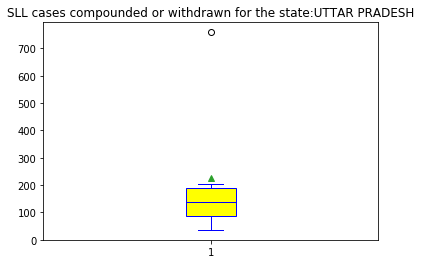

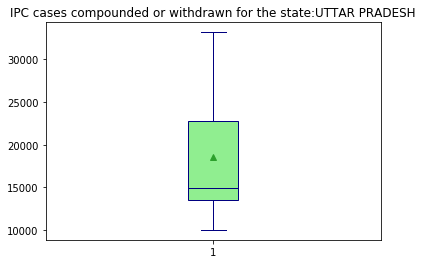

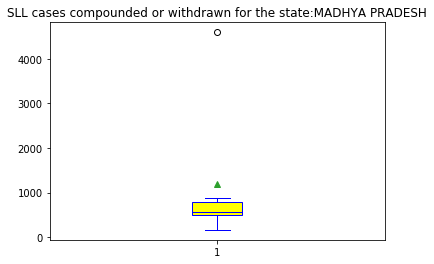

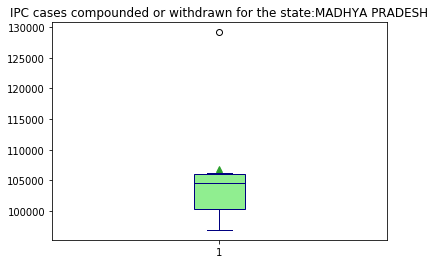

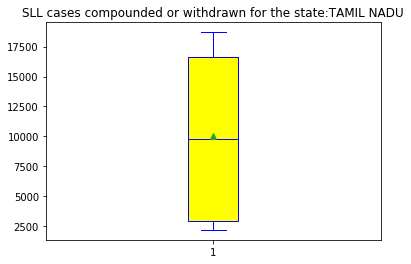

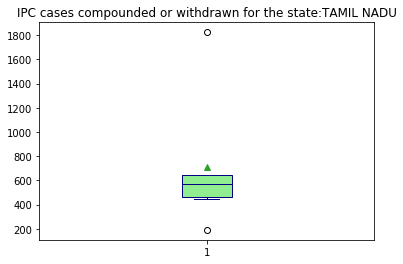

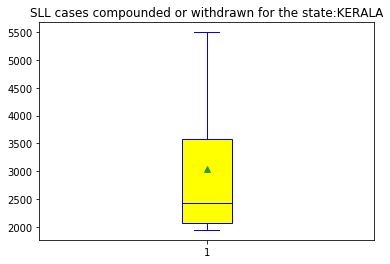

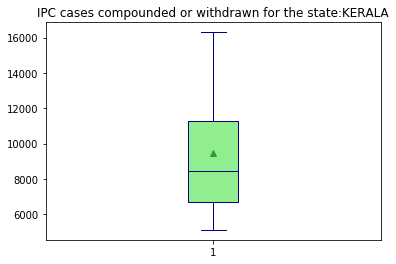

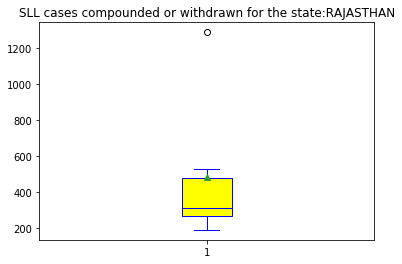

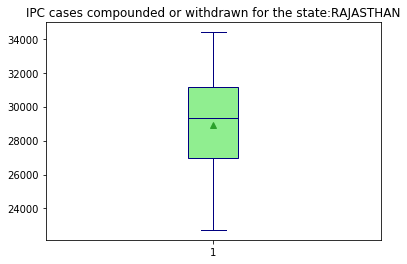

In [155]:
# Lets create a box plot for the number of cases compounded for these top 5 states
for s in state_list:
    x = Disposal_SLL_df.Compounded_Withdrawn[Disposal_SLL_df.State_UT == s]
    y = Disposal_IPC_df.Compounded_Withdrawn[Disposal_IPC_df.State_UT == s]
    bp = plt.boxplot(x,patch_artist=True,showmeans=True)
    plt.title("SLL cases compounded or withdrawn for the state:"+s)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="blue")
    for patch in bp['boxes']:
        patch.set(facecolor="Yellow") 
    plt.show()
    bp = plt.boxplot(y,patch_artist=True,showmeans=True)
    plt.title("IPC cases compounded or withdrawn for the state:"+s)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="navy")
    for patch in bp['boxes']:
        patch.set(facecolor="lightgreen")
    plt.show()


In [165]:
# the summary table for each state
print("The average number of cases compouned or withdrawn for the years 2008-2013 is:")
state_list = Disposal_SLL_df.State_UT.unique()
summary_df = pd.DataFrame({"State_UT":state_list,
                           "Avg_SLL_Compounded_Withdrawn":[round(mean(Disposal_SLL_df.Compounded_Withdrawn[Disposal_SLL_df.State_UT==k])) for k in state_list],
                           "Avg_IPC_Compounded_Withdrawn":[round(mean(Disposal_SLL_df.Compounded_Withdrawn[Disposal_SLL_df.State_UT==k])) for k in state_list]})

display(summary_df)

The average number of cases compouned or withdrawn for the years 2008-2013 is:


,State_UT,Avg_SLL_Compounded_Withdrawn,Avg_IPC_Compounded_Withdrawn
0,A & N ISLANDS,0,0
1,ANDHRA PRADESH,2929,2929
2,ARUNACHAL PRADESH,2,2
3,ASSAM,14,14
4,BIHAR,539,539
5,CHANDIGARH,0,0
6,CHHATTISGARH,887,887
7,D & N HAVELI,0,0
8,DAMAN & DIU,0,0
9,DELHI,0,0
